### **Group 31** <br>
* Ana Margarida Valente, nr 20240936
* Eduardo Mendes, nr 20240850
* Julia Karpienia, nr 20240514
* Marta Boavida, nr 20240519
* Victoria Goon, nr 20240550

<hr>

**Table of Contents** <br>
* [1. Import](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Datasets](#importdatasets)
* [2. Data Exploration](#dataexploration)
    * [2.1. Data Content and decriptive analysis](#dataanalysis)
    * [2.2. Checking incoherencies in the data](#incoherencies)
       * [2.2.1 Changing the data types](#types)
       * [2.2.2 Checking Duplicates](#duplicates)
       * [2.2.3 Checking Unique Values & looking for some values that can indicate missing values](#unique)
* [3. Data Visualisation](#visualisation)
   * [3.1. Define Metric and Non-Metric Features](#metricandnon)
   * [3.2 Metric Features](#metric)
   * [3.3 Non-Metric Features](#non)
   * [3.4 Target Variable](#33-target-variable)
* [4. Data Cleaning and Pre-Processing](#clean)
   * [4.1. Missing values in the target variable  - Claim Injury Type](#nantarget)
   * [4.2. Missing values in the independent variables](#nanindependent)
* [5. Feature Engineering](#feateng)
* [6. Multivariate Analysis](#multi)
* [7. Outliers](#outliers)
  * [7.1. Visualisation of Outliers](#viewoutliers)
  * [7.2. Outlier Removal](#removeoutliers)
    * [7.2.1 Manual Outlier Removal](#manual)
* [8. Data Transformation - Encoding and Scaling](#transform)
  * [8.1. Feature Encoding](#encode)
  * [8.2. Min-max Scaler](#minmax)
  * [8.3 Standard Scaler](#std) 
  * [8.4 Robust Scaler](#robust) 
* [9. Feature Selection](#featselect)
  * [9.1. Feature Selection - Categorical Features](#cat)
    * [9.1.1 Filter Methods](#filter)
      * [9.1.1.1 Chi-Square](#chi)
      * [9.1.1.2 Cramér's V](#cramer)
      * [9.1.1.3 Mutual Information](#mi)
    * [9.1.2 Embedded Methods](#emb)
      * [9.1.2.1 Random Forest Feature Importance](#rf)
      * [9.1.2.2 Decision Tree](#dt)
      * [9.1.2.3 Catboost](#cb)
    * [9.1.3 Analysis of all the methods](#all)
  * [9.2 Feature Selection - Numerical Features](#numfeat)
    * [9.2.1 Wrapper Methods](#wrapper)
      * [9.2.1.1 RFE](#rfe)
    * [9.2.2 Embedded Methods](#embedded)
      * [9.2.2.1 Lasso Regression](#lasso)
      * [9.2.2.2 Random Forest Feature Importance](#rm_num)
    * [9.2.3 Filter Methods](#filter_num)
      * [9.2.3.1 Univariate variables](#uni)
      * [9.2.3.2 Select K Best Method](#select)
    * [9.2.4 Hybrid Methods](#hybrid)
      * [9.2.4.1 Graph-based Automatic Feature selection](#graph)
  * [9.3 Drop Features According to Feature Selections](#dropfeat)
* [10. Save Proprocessed Data](#Proprocessed)
         



<hr>
<a class="anchor" id="import">
    
# 1. Import 
    

</a> 

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

Libraries to install, if needed:

In [17]:
! pip install catboost
# !pip install networkx

In [18]:
## Import standard data processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import datetime object for date columns in dataset
from datetime import datetime

## Setting seaborn style
sns.set()

from math import ceil
from sklearn.impute import KNNImputer

## Import train_test_split to split data for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


## Import Libraries for Feature Selection
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

#from catboost import CatBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV


## Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV

# Import Cross Validation methods
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None) #Show all columns


## Supress warnings
import warnings
warnings.filterwarnings('ignore')


<a class="anchor" id="importdatasets">

## 1.2. Import Datasets

</a>

- Train and Test

In [19]:
train_data = pd.read_csv('train_data.csv', low_memory=False)
test_data = pd.read_csv('test_data.csv')

- Agreement Reached

In [20]:
agreement_data=pd.read_csv('Agreement_Reached_Predictions_under.csv')

In [21]:
agreement_data.head()

,Claim Identifier,Agreement Reached
0,6165911,0
1,6166141,0
2,6165907,0
3,6166047,0
4,6166102,0


In [22]:
agreement_data= agreement_data.set_index("Claim Identifier")

In [23]:
agreement_data.head()

,Agreement Reached
Claim Identifier,
6165911,0
6166141,0
6165907,0
6166047,0
6166102,0


<hr>
<a class="anchor" id="Dataexploration">
    
# 2. Data Exploration
    
</a>

<a class="anchor" id="dataanalysis">

## 2.1. Data content and descriptive analysis

</a>

In [24]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [25]:
test_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


In [26]:
train_data.shape

(593471, 33)

In [27]:
test_data.shape

(387975, 30)

Train data has 3 more variables than test data. We can see below which feature are train, but not in test.

In [28]:
test_data.columns.values

array(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date',
       'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents'], dtype=object)

In [29]:
train_data.columns.values

array(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'], dtype=object)

In the Test dataset there is not variables such as: Claim Injury Type (reasonable because it is target variable), Agreement Reached and WCB Decision.

In [30]:
# Set "Claim Identifier" as the index for the train and test datasets
train_data = train_data.set_index("Claim Identifier")
test_data = test_data.set_index("Claim Identifier")

In [31]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.0,NaN,NaN,NaN,42.11427,14.256432,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,593471,1096,2020-03-06,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.0,NaN,NaN,NaN,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,NaN,NaN,NaN,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574026,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Summary of Descriptive Statistics:

Most frequent categorical features:
- "Claim Injury Type": "2. NON-COMP" is the most frequent, with 291,078 entries.
- "Carrier Name": The most common carrier is "STATE INSURANCE FUND" with 111,144 entries.
- "Gender": Male ("M") is the most common category (335,218 entries), suggesting a gender imbalance in the data.
- "COVID-19 Indicator": Most records (546,505) indicate "N," showing that COVID-19 was not a factor in most claims.

Numerical features:
- Age at injury: Most injured individuals fall between 31 and 54 years, indicating a concentration around working-age individuals. Outliers such as 0 and 117 years suggest data cleaning might be needed.
- Average Weekly Wage: The large standard deviation and extreme maximum value suggest high variability and the presence of significant outliers. Skewed distribution.
- Birth year: The "0" minimum and extremely low mean are likely erroneous. Valid years (25th to 75th percentile) reflect a population mostly born between 1965 and 1989.
- WCIO Part Of Body Code: The presence of a negative value (-9) suggests data errors.
- Agreement reached: This binary feature is heavily skewed, with most cases having "0" (no agreement reached). 

Final conclusions Numerical features:
- Outliers: Features such as "Average Weekly Wage", "Birth Year", and "Age at Injury" contain extreme values or errors that require handling to improve data quality.
- Skewness: Features like "Average Weekly Wage" and "Agreement Reached" show high skewness, indicating the need for transformation or careful handling.

In [32]:
test_data=pd.merge(test_data,agreement_data, on='Claim Identifier', how='inner')

In [33]:
test_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Agreement Reached
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1,0
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1,0
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6,0
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5,0


---

<a class="anchor" id="incoherencies">

## 2.2. Checking incoherencies in the data. 

</a> 

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  County of Injury        

<a class="anchor" id="types">

### 2.2.1 Changing the data types

</a> 

The datatypes of the following features were corrected in both training and test datasets:
- Age_at_injury (from float to integer)
- Number of Dependents (from float to integer)
- Birth year (from float to integer)
- WCIO codes (from float to integer)
- Industry code (from float to integer)

- Accident Date (from object to datetime)
- Assembly Date (from object to datetime)
- C2 Date (from object to datetime)
- C3 Date (from object to datetime)
- First Hearing Date (from object to datetime)

- First hearing Date (from object to datetime) - only on training dataset, since this feature doesn't exist in the test dataset.

In [644]:
train_data["Age at Injury"] = train_data["Age at Injury"].astype("Int64")
test_data["Age at Injury"] = test_data["Age at Injury"].astype("Int64")

train_data["Number of Dependents"] = train_data["Number of Dependents"].astype("Int64")
test_data["Number of Dependents"] = test_data["Number of Dependents"].astype("Int64")

train_data["Birth Year"] = train_data["Birth Year"].astype("Int64")
test_data["Birth Year"] = test_data["Birth Year"].astype("Int64")

train_data["WCIO Part Of Body Code"] = train_data["WCIO Part Of Body Code"].astype("Int64")
test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].astype("Int64")

train_data["WCIO Nature of Injury Code"] = train_data["WCIO Nature of Injury Code"].astype("Int64")
test_data["WCIO Nature of Injury Code"] = test_data["WCIO Nature of Injury Code"].astype("Int64")

train_data["WCIO Cause of Injury Code"] = train_data["WCIO Cause of Injury Code"].astype("Int64")
test_data["WCIO Cause of Injury Code"] = test_data["WCIO Cause of Injury Code"].astype("Int64")

train_data["Industry Code"] = train_data["Industry Code"].astype("Int64")
test_data["Industry Code"] = test_data["Industry Code"].astype("Int64")

train_data["Agreement Reached"] = train_data["Agreement Reached"].astype("Int64")

train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date'])
test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date'])

train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date'])
test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date'])

train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date'])
test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date'])

train_data["C-3 Date"] = pd.to_datetime(train_data['C-3 Date'])
test_data["C-3 Date"] = pd.to_datetime(test_data['C-3 Date'])

train_data["First Hearing Date"] = pd.to_datetime(train_data['First Hearing Date'])
test_data["First Hearing Date"] = pd.to_datetime(test_data['First Hearing Date'])

<a class="anchor" id="duplicates">

### 2.2.2 Checking Duplicates

</a> 

In [ ]:
# Filter duplicates (keep=False ensures all instances of duplicates are included)
duplicates = train_data.loc[train_data.duplicated(keep=False), :]

# Sort by all columns to group duplicates together
duplicates_sorted = duplicates.sort_values(by=duplicates.columns.tolist())

# Display the first 30 rows
duplicates_sorted.head(30)

In [ ]:
# Filter duplicates (keep=False ensures all instances of duplicates are included)
duplicates = test_data.loc[test_data.duplicated(keep=False), :]

# Sort by all columns to group duplicates together
duplicates_sorted = duplicates.sort_values(by=duplicates.columns.tolist())

# Display the first 30 rows
duplicates_sorted.head(30)

In [ ]:
duplicates_sum_train = train_data.duplicated().sum()
duplicates_sum_test = test_data.duplicated().sum()

print(f"There are {duplicates_sum_train} in the training dataset.")
print(f"There are {duplicates_sum_test} in the test dataset.")

We do not drop duplicates in the test dataset. We only do that in the train dataset.

In [648]:
train_data.drop_duplicates(inplace=True)

* Check if there are any duplicated indexes

In [ ]:
num_duplicates = train_data.index.duplicated().sum()
print(f"Number of duplicate indexes: {num_duplicates}")

<a class="anchor" id="unique">

### 2.2.3 Checking unique values & looking for some values that can indicate missing values

</a> 

In [ ]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    unique_values_num = train_data[column].nunique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print(f"Number of unique values in '{column}':")
    print(unique_values_num)
    
    print()

Cells below are commented because they were used to check more detailed unique values for chosen variables

In [651]:
# train_data['Accident Date'].value_counts().sort_index(ascending=False)

In [652]:
# train_data['Age at Injury'].value_counts().sort_index(ascending=False)

In [653]:
# train_data['Assembly Date'].value_counts().sort_index(ascending=False)

In [654]:
# train_data['Average Weekly Wage'].value_counts().sort_index(ascending=False)

In [655]:
# train_data['Birth Year'].value_counts().sort_index(ascending=False)

In [656]:
# train_data['C-2 Date'].value_counts().sort_index(ascending=False)

In [657]:
# train_data['C-3 Date'].value_counts().sort_index(ascending=False)

In [658]:
# train_data['Carrier Name'].value_counts().sort_index()

In [659]:
# train_data['Carrier Type'].value_counts().sort_index()

In [660]:
# train_data['First Hearing Date'].value_counts().sort_index()

In [661]:
# train_data['Zip Code'].value_counts().sort_index()

#### All listed Variables - unique variables summary 

1. **Accident Date**: contains dates, no strange values (5539 unique values)

2. **Age at Injury**: there are some values >100 and there is age equal to  0  (108 unique values) 
3. **Alternative Dispute Resolution**: there is one strange unique value such as "U" (3 unique values)
4. **Assembly Date**: containts dates, no strange values (1096 unique values)
5. **Attorney/Representative**: no strange values (2 unique values)
6. **Average Weekly Wage**: no typical strange values but there are many records sayin that avg weekly wage is equal to 0, a lot of unique values (120024 unique values)
7. **Birth Year**:  one strange values "0" (Birth Year cannot be 0) (107 unique values)
8. **C-2 Date**: contains data, there are some years from 90s (2475 unique values)
9. **C-3 Date**: contains data, there are some years from 90s (1648 unique values)
10. **Carrier Name**: there are some strange description such as: '*** CARRIER UNDETERMINED ***', (2046 unique values) 
11. **Carrier Type**: there is one strange value 'UNKNOWN' (8 unique values)
12. **Claim Injury Type**: no strange values (8 unique values)
13. **County of Injury**: there is one strange value 'UNKNOWN' (63 unique values)
14. **COVID-19 Indicator**: no strange values (2 unique values)
15. **District Name**: no strange values (8 unique values)
16. **First Hearing Date**: no strange values (1094 unique values)
17. **Gender**: two strange values 'U' 'X' (4 unique values)
18. **Industry Code**: no strange values (24 unique values)
19. **Industry Code Description**: no strange values (20 unique values)
20. **Medical Fee Region**: one strange value 'UK' (4 unique values)
21. ***OIICS Nature of Injury Description**: variable does not contain any data
22. **WCIO Cause of Injury Code**: no strange values (77 unique values) 
23. **WCIO Cause of Injury Description**: no strange values (74 unique values)
24. **WCIO Nature of Injury Code**: and no strange values (56 unique values)
25. **WCIO Nature of Injury Description**: no strange values (56 unique values)
26. **WCIO Part Of Body Code**: one strange values "-9" (57 unique values)
27. **WCIO Part Of Body Description**: no strange values (54 unique values)
28. **Zip Code**:  this variables is a bit strange, it has some strange zip codes such as zip code '.1605', '00000' or '99999' that does not exist, also it has zip codes that starts with letters not with numbers as well as one unique value 'UNKNO' (8286 unique values)
29. **Agreement Reached**:  no strange values (2 unique values)
30. **WCB Decision**: no strange values (1 unique value)
31. **Number of Dependents**: no strange values (7 unique values)


Based on the description above we changed strange values to missing values.

In [662]:
# Filling missing values with NaN

train_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)
test_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)

train_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)
test_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)

train_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)
test_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)

train_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)
test_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)

train_data['Gender'].replace(['X','U'], np.nan, inplace = True)
test_data['Gender'].replace(['X','U'], np.nan, inplace = True)

train_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)
test_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)

train_data['Zip Code'].replace([".1605", "00000", "99999","UNKNO"], np.nan, inplace=True)
test_data['Zip Code'].replace([".1605", "00000", "99999", "UNKNO"], np.nan, inplace=True)

Investigating 0 values in the Age variable

In [ ]:
train_data[train_data['Age at Injury'] == 0].shape

In [664]:
# age_at_injury_zero = train_data[train_data['Age at Injury'] == 0]
# age_at_injury_zero.groupby('Birth Year')['Age at Injury'].value_counts(dropna=False).sort_index()

There are 5463 zeros in total in the variables Age at Injury.
- There are 1926 values that are 0 both in Birth Year as well as at Age at Injury 
- The rest of the zero values (3537) in the variable Age at Injury can be replaced with actual age calulated as accident date - birth year 

Replacing the Age at Injury values that are equal to 0 (where Birth Year is not equal to 0) with the actual age calculated from the difference between the Accident Date and the Birth Year

In [665]:
train_data['Actual Age'] = train_data['Accident Date'].dt.year - train_data['Birth Year']

filtered_rows = train_data[(train_data['Birth Year'] != 0) & (train_data['Age at Injury'] == 0)]

train_data.loc[filtered_rows.index, 'Age at Injury'] = train_data['Actual Age']

In [666]:
test_data['Actual Age'] = test_data['Accident Date'].dt.year - test_data['Birth Year']

filtered_rows = test_data[(test_data['Birth Year'] != 0) & (test_data['Age at Injury'] == 0)]

test_data.loc[filtered_rows.index, 'Age at Injury'] = test_data['Actual Age']

Check if there are any incoherencies in between Age at Injury that is given in the data set and Actual Age calulated as difference between Accident Date and Birth Year

In [ ]:
train_data['Age Diff'] = train_data['Actual Age'] - train_data['Age at Injury']

age_difference = train_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


In [ ]:
test_data['Age Diff'] = test_data['Actual Age'] - test_data['Age at Injury']

age_difference = test_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


Conclusion:

There are no incoherencies in between those two variables. the only unique values are 1 and -1 and that difference can be caused by the fact that we dont have the Birth Month, so Actual Age can be slightly different from the Age Calculated as subtraction of Accident Date and Birth Year.

In [669]:
train_data.drop(columns=['Actual Age','Age Diff'], inplace=True)
test_data.drop(columns=['Actual Age', 'Age Diff'], inplace=True)

In [670]:
# train_data['Age at Injury'].value_counts().sort_index()

In [ ]:
train_data[(train_data['Age at Injury'] == 0)].shape

In [672]:
# train_data.groupby('Age at Injury')['Birth Year'].value_counts(dropna=False).sort_index()

Changing Age at Injury from 0 to missing values where the Birth Year has missing value.

In [673]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'].isna()), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'].isna()), 'Age at Injury'] = np.nan


Changing Age at Injury from 0 to missing values where the Birth Year is also 0

In [674]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'] == 0), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'] == 0), 'Age at Injury'] = np.nan

In [675]:
# train_data['Age at Injury'].value_counts(dropna=False).sort_index()

At this point Birth Year variable can be dropped since it has similar info as Age at Injury 

In [676]:
train_data = train_data.drop('Birth Year', axis=1)
test_data = test_data.drop('Birth Year', axis=1)

There is also strange value (code equal to -9) in the variable WCIO Part Of Body Code. According WCIO website there is no such code as -9. We checked with variable WCIO Part of Body Description which description corresponds to Code -9 in our data set. We found out that -9 is always associated with description "Multiple".

In [ ]:
filtered_data_train = train_data[train_data["WCIO Part Of Body Code"] == -9]
filtered_data_train["WCIO Part Of Body Description"].value_counts()

In [ ]:
filtered_data_test = test_data[test_data["WCIO Part Of Body Code"] == -9]
filtered_data_test["WCIO Part Of Body Description"].value_counts()

We deal with that "-9" values after splitting into validation and training set (in the filling missing values section)

Variable ***Zip Code*** has a lot of unique values. Therefore, we decided to group Zip Code based on their first digit of the ZipCode

In [679]:
def categorize_zip(zip_code):
    if pd.isna(zip_code):  
        return np.nan 
    elif isinstance(zip_code, str) and zip_code[0].isdigit():
        return zip_code[0]
    else:
        return "Other"

In [ ]:
train_data['zip_code_cat'] = train_data['Zip Code'].apply(categorize_zip)
test_data['zip_code_cat'] = test_data['Zip Code'].apply(categorize_zip)

train_data['zip_code_cat'].value_counts(dropna=False)

After we created zip_code_cat we can drop the variable Zip Code

In [681]:
train_data = train_data.drop('Zip Code', axis =1)
test_data = test_data.drop('Zip Code', axis =1)

We decided to drop variables such us: OIICS Nature of Injury Description and WCB Decision. First variable does not containt any values and second one contains only one unique value, so any of them are not informative. We drop WCB Decision only from the train_data because it is not included in the test_data

In [682]:
train_data =train_data.drop(['OIICS Nature of Injury Description','WCB Decision'], axis=1) #'Agreement Reached'
test_data = test_data.drop(['OIICS Nature of Injury Description'],axis=1)

Based on the description of unique values we can assume that variables such as 'WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name' could be considered to being dropped, becuase they containts description of coded variables, so we do not need to duplicate the information. 

Recheck for unique values in those variables that have been changed

In [683]:
# train_data['Alternative Dispute Resolution'].value_counts().sort_index()

In [684]:
# train_data['Carrier Name'].value_counts().sort_index()

In [685]:
# train_data['Carrier Type'].value_counts().sort_index()

In [686]:
# train_data['County of Injury'].value_counts().sort_index()

In [687]:
# train_data['Gender'].value_counts().sort_index()

In [688]:
# train_data['Medical Fee Region'].value_counts().sort_index()

In [689]:
# train_data['Zip Code'].value_counts().sort_index()

---

<a class="anchor" id="visualisation">

# 3. Data Visualisation

</a>

<a class="anchor" id="metricandnon">

## 3.1 Define Metric and Non-Metric Features

</a>

Before doing data visualisation we define metric and non-metric features

In [ ]:
train_data.columns

In [691]:
### Define metric & non-metric features

metric_features = ["Age at Injury", "Average Weekly Wage", "IME-4 Count", "Number of Dependents"]

non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Agreement Reached", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description","zip_code_cat"]


-----------------------

<a class="anchor" id="metric">

## 3.2 Metric Features

</a>

In [ ]:
train_data['Age at Injury'].plot(
    kind='hist',
    color=plt.cm.tab20(1) , 
    edgecolor='black',
    bins=19
)

plt.title('Histogram of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency') 
plt.show()

Analysis of variable Age at Injury:
- The data is primarily concentrated between ages 20 and 70, with minimal occurrences beyond age 80. 
- The age group with the highest frequency of injuries appears to be in the range of 40 to 50, followed closely by the 30-40 and 50-60 ranges.
- The histogram is roughly symmetric and bell-shaped, suggesting a somewhat normal distribution centered around middle-aged individuals (30-60).
- There are some cases of injuries at extreme ages (under 10 and over 80), though these are rare compared to the central age groups. (Possible outliers)


In [ ]:
train_data['Average Weekly Wage'].plot(
    kind='hist',
    color=plt.cm.tab20(1) ,
    edgecolor='black',
    bins=19
)

plt.title('Histogram of Average Weekly Wage')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Log10(Frequency)')
plt.yscale('log')  
plt.show()   

Analysis of variable Average Weekly Wage:
- Most data points are concentrated at the very low end of the wage scale, with a large spike around the minimum wage range. This suggests that the majority of individuals earn a relatively low weekly wage.
- The y-axis is in a logarithmic scale, indicating that the actual frequencies vary greatly. This scale allows us to see the distribution more clearly, even though most values are concentrated at the low end.
- As wages increase, the frequency decreases rapidly. There are only a few occurrences of higher wages, suggesting that high average weekly wages are rare.
- There are small bars at the far right end of the scale (near 2.5 million), which could indicate a few extreme outliers or high-income earners in the dataset. (Possible outliers)

In [ ]:
train_data['IME-4 Count'].plot(
    kind='hist',
    color=plt.cm.tab20(1) , 
    edgecolor='black',
    bins=19
)

plt.title('Histogram of IME-4 Count')
plt.xlabel('IME-4 Count')
plt.ylabel('Log10(Frequency)')
plt.yscale('log')  
plt.show()   

Analysis of variable IME-4 Count:
- The data is heavily skewed towards lower values of IME-4 Count, with the highest frequency occurring between 0 and 10. 
- The y-axis is in a logarithmic scale, indicating that the actual frequencies vary greatly. This scale allows us to see the distribution more clearly, even though most values are concentrated at the low end.
- The frequency decreases as the IME-4 Count increases. There is a gradual decline from low to high values, with only a few occurrences beyond 50.
- There is a small bar at the far right (around 70), suggesting a few outliers with unusually high IME-4 Counts.

In [ ]:
train_data['Number of Dependents'].plot(
    kind='hist',
    color=plt.cm.tab20(1) , 
    edgecolor='black',
    bins=5
)

plt.title('Histogram of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency') 
plt.show()

Analysis of variable Number of Dependents:

•⁠  ⁠The highest frequencies are at 0 and 6 dependents.

•⁠  ⁠There is a noticeable decrease in frequency for categories 2, 3, and 4 dependents, indicating fewer cases.

In [696]:
# def plot_filtered_histogram(data, column_name, min_value, max_value, bins=19):
    
#     # Filter the data to include only the values in the specified range
#     filtered_data = train_data[(train_data[column_name] >= min_value) & (train_data[column_name] <= max_value)][column_name].dropna()
    
#     #Histogram
#     plt.figure(figsize=(10, 6))
#     plt.hist(filtered_data, bins=bins, color=plt.cm.tab20(1) , edgecolor='black')
#     plt.title(f'Histogram of {column_name} (range: {min_value} to {max_value})')
#     plt.xlabel(column_name)
#     plt.ylabel('Frequency')
#     plt.grid(axis='y', alpha=0.75)
#     plt.show()

In [697]:
# plot_filtered_histogram(train_data, column_name="Birth Year", min_value=1920, max_value=2024, bins=19)

-------------------------------

<a class="anchor" id="non">

## 3.3 Non-Metric Features

</a>

In [ ]:
for column in non_metric_features:
    
    top_categories = train_data[column].value_counts().head(10)

    top_categories_sorted = top_categories.sort_values(ascending=True)

    data_filtered = train_data[train_data[column].isin(top_categories_sorted.index)]
    
   
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_filtered, 
                  x=column, 
                  order=top_categories_sorted.index,  
                  palette='tab20')
    
  
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Top 10 Categories in {column}')
    
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Analysis of Categorical Variables
 - **Industry Code**

    The top 2 industry codes are **62** (almost 120.000) and **92** (almost 100.000) with a large marge relatively to the rest


 - **WCIO Cause of Injury Code**

   The most common cause of injury has the code **56** (almost 50.000) with a marge relatively to the others


 - **WCIO Nature of Injury Code** 

   The top 2 industry codes are **52** (close to 160.000) and **10** (closte to 110.000) with a large marge relatively to the rest


 - **WCIO Part of Body Code** 

   The most common causes of injury have the code **42** (slightly exceeds 50.000) and **53** (close to 50.000)


 - **Accident Date**

   01-03-2023 (slightly exceeds 1200) with a large marge relatively to the others


- **Alternative Dispute Resolution**

   100% = No


- **Assembly Date** 

   Top 3: 06-03-2020 (1400), 11-05-2021 (close to 1400) and 01-04-2022 (slightly exceeds 1200)


- **Attorney/Representative**

   Almost 400.000 = No


- **C-2 Date**

   11-05-2021 (close to 1875) with a large marge in relation to the others


- **C-3 Date**

   Top 3: 21-04-2021, 26-10-2020 and 10-02-2020 (all 3 close to 350)


- **Carrier Name** 

   State Insurance Fund (more than 100.000) with a large marge in relation to the others


- **Carrier Type**

   1A.Private (almost 300.000) with a large marge in relation to the others


- **County of Injury**

   Top 3: Suffolk (more than 60.000), Queens (almost 60.000) and Kings (slightly exceeds 50.000)


- **COVID-19 Indicator**

   No (Close to 550.000)


- **District Name**

   NYC (slightly exceeds 255.000) with a large marge in relation to the others


- **Fisrt Hearing Date**

   Top 3: 15-04-2022 (close to 500), 20-01-2022 (slightly exceeds 400) and 15-02-2022 (400)


- **Gender** 

   Male with almost 350.000


- **Industry Code Description**

   The more frequent are: Health Care and Social Assistance (almost 120.000) and Public Administration (slightly exceeds 90.000) with a large marge in relation to the others


- **Medical Fee Region** 

   IV (close to 275.000) with a large marge in relation to the others


- **WCIO Cause os Injury Description**

   Top 3: Fellow worker, Patient or Other Person (close to 50.000), Strain or Injury By, NOC (close to 40.000) and Fall, Slip or Trip, NOC (slightly exceeds 30.000)


- **WCIO Nature of Injury Description**

   Strain or Tear (150.000) and Contusion (slightly exceeds 100.000) with a large marge in relation to the others


- **WCIO Part of Body Description**

   Top 3: Lower Back Area (close to 50.000), Knee (close to 50.000) and Multiple (slightly exceeds 40.000)


- **Zip Code Categorie**

   1 (slightly exceeds 500.000) with a large marge in relation to the others

--------------------------

<a class="anchor" id="non">

## 3.3 Target variable

</a>

### Claim Injury Type distribution

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data,
              x='Claim Injury Type',  
              palette='tab20')
    
  
plt.xlabel('Claim Injury Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Target Variable')
    
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analysis of Target Variable
-  ⁠The target variable, "Claim Injury Type," shows a significant class imbalance.
-  ⁠The most common category is "2. NON-COMP", with around 300.000 cases, which is far more frequent than any other category.
- ⁠"4. TEMPORARY" and "3. MED ONLY" follow as the second and third most common categories, but with notably fewer counts than "2. NON-COMP".
-  ⁠The categories "1. CANCELLED", "6. PPD NSL", "7. PTD", and "8. DEATH" have very few cases, indicating they are rare events in the dataset.

---

<a class="anchor" id="clean">

# 4. Data Cleaning and Pre-processing

</a>

<a class="anchor" id="nantarget">

## 4.1 Missing values in the target variable - Claim Injury Type

</a>

In [ ]:
train_data["Claim Injury Type"].isna().sum()

In [38]:
missing_data_target = train_data[train_data['Claim Injury Type'].isna()]
missing_data_target.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
missing_data_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 957648180 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Accident Date                       0 non-null      object 
 1   Age at Injury                       0 non-null      float64
 2   Alternative Dispute Resolution      0 non-null      object 
 3   Assembly Date                       19445 non-null  object 
 4   Attorney/Representative             0 non-null      object 
 5   Average Weekly Wage                 0 non-null      float64
 6   Birth Year                          0 non-null      float64
 7   C-2 Date                            0 non-null      object 
 8   C-3 Date                            0 non-null      object 
 9   Carrier Name                        0 non-null      object 
 10  Carrier Type                        0 non-null      object 
 11  Claim Injury Type                 

We conclude that all observations with missing values on the target, also have missing values on all other features excelpt assembly date, so we decided to drop them.

In [703]:
train_data= train_data.drop(missing_data_target.index)

Re check for missing values in the target variable

In [ ]:
train_data['Claim Injury Type'].isna().sum()

---

<a class="anchor" id="nanindependent">

## 4.2 Missing values in the intependent variables

</a>

##### - Before we check for missing values in the independet variables we split our data into training and validation set

In [705]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [706]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)


##### Checking the number of missing values in each variable in the train and validation set (number and percentage)

In [707]:
# missing_values_train = X_train.isnull().sum().sort_values(ascending=False)
# print(missing_values_train)

In [708]:
# missing_values_val = X_val.isnull().sum().sort_values(ascending=False)
# print(missing_values_val)

In [ ]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
print(missing_percentage_train)

In [ ]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
print(missing_percentage_val)

In [ ]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
print(missing_percentage_test)

Variables such as ***IME-4 Count*** , ***First Hearing Date*** and ***C-3 Date*** have more than 60% of missing values. 
<br> In variables ***IME-4 Count*** we assume that missing values states that IME-4 form has not been received. Therefore missing values will be replaced with 0.
<br> Missing values in variable ***First Hearing Date*** means that claim has not yet had a hearing held (information provided in dataset description) Thus, it is an information that we want to keep. 
<br> For missing values in variables ***C-3 Date*** we asume that missing value means that Employee Claim Form has not been received. 

In the first trial we deleted those three variables since they have a lot of missing values but as we run the model without and got poorly performing model we decided to keep them and we found out that they have significant impact on the target variable and should not be dropped (model performance increased)

- **IME-4 Count** changing missing values to 0

In [712]:
X_train.loc[X_train["IME-4 Count"].isna(), "IME-4 Count"] = 0
X_val.loc[X_val["IME-4 Count"].isna(), "IME-4 Count"] = 0
test_data.loc[test_data["IME-4 Count"].isna(), "IME-4 Count"] = 0

- **First Hearing Date** 
<br> We decided to change that varibale to binary variable, where NaN values are replaced by 0 - it means that claim has not had a hearing held yet and dataes are replaced by 1 which means that hearing has already been held.

In [ ]:
X_train['First Hearing Date Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Date Binary'] = X_val['First Hearing Date'].notna().astype(int)
test_data['First Hearing Date Binary'] = test_data['First Hearing Date'].notna().astype(int)

X_train[['First Hearing Date', 'First Hearing Date Binary']].head()


First Hearing Data variable can be droped after creating binary variable.

In [714]:
X_train =X_train.drop("First Hearing Date", axis=1)
X_val =X_val.drop("First Hearing Date", axis=1)
test_data =test_data.drop("First Hearing Date", axis=1)

In [715]:
non_metric_features.remove('First Hearing Date')
non_metric_features.append('First Hearing Date Binary')

- **C-2 Date Bin**
<br> Creating a binary variable from C-2 Date. Changing missing values to 0 and dates to 1

In [716]:
X_train['C-2 Date Bin'] = X_train['C-2 Date'].notna().astype(int)
X_val['C-2 Date Bin'] = X_val['C-2 Date'].notna().astype(int)
test_data['C-2 Date Bin'] = test_data['C-2 Date'].notna().astype(int)

X_train[['C-2 Date', 'C-2 Date Bin']].head()
non_metric_features.append('C-2 Date Bin')

- **C-3 Date Bin** 
<br> Creating a binary variable from C-3 Date. Changing missing values to 0 and dates to 1

In [ ]:
X_train['C-3 Date Bin'] = X_train['C-3 Date'].notna().astype(int)
X_val['C-3 Date Bin'] = X_val['C-3 Date'].notna().astype(int)
test_data['C-3 Date Bin'] = test_data['C-3 Date'].notna().astype(int)

X_train[['C-3 Date', 'C-3 Date Bin']].head()

In [718]:
non_metric_features.remove('C-3 Date')
non_metric_features.append('C-3 Date Bin')

In [719]:
X_train =X_train.drop("C-3 Date", axis=1)
X_val =X_val.drop("C-3 Date", axis=1)
test_data =test_data.drop("C-3 Date", axis=1)

Re check for missing percentage in the datasets

In [ ]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0]
print(missing_percentage_train)

In [ ]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
missing_percentage_val = missing_percentage_val[missing_percentage_val > 0]
print(missing_percentage_val)

In [ ]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
missing_percentage_test = missing_percentage_test[missing_percentage_test > 0]
print(missing_percentage_test)

As it was mentioned in the part "Checking incoherencies in the data" **WCIO Part of Body Code** has negavite codes such us -9. Each code that is equal to -9 corresponds in the description to Multiple.
Acording to WCIO website codes that contains in the description word multiple are: 10, 20, 30, 40, 50, 90, 91. Thus, we decided to fill those values (-9) with mode among codes that corresponds to multiple. 

In [723]:
# Valid codes for "Multiple" according to codes at WCIO website (https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf)
multiple_codes = [10, 20, 30, 40, 50, 90, 91]

# Calculate the mode among the valid multiple codes
mode_value = X_train[X_train["WCIO Part Of Body Code"].isin(multiple_codes)]["WCIO Part Of Body Code"].mode()[0]

# Replace only -9 values with the mode (without changing other NaN values)
X_train["WCIO Part Of Body Code"] = X_train["WCIO Part Of Body Code"].replace(-9, mode_value)

test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].replace(-9, mode_value)

X_val["WCIO Part Of Body Code"] = X_val["WCIO Part Of Body Code"].replace(-9, mode_value)


- All missing values in the variable ***Average Weekly Wage***  and ***Age at Injury*** are replaced by KNNImputer 

In [726]:
features_to_impute = ['Average Weekly Wage', 'Age at Injury']

imputer = KNNImputer(n_neighbors=5, weights="uniform")

X_train[features_to_impute] = imputer.fit_transform(X_train[features_to_impute])
X_val[features_to_impute] = imputer.transform(X_val[features_to_impute])
test_data[features_to_impute] = imputer.transform(test_data[features_to_impute])

- Categorical variables that missing values should be replaced with mode

In [727]:
# List of categorical columns that missing values should be replaced with mode
mode_variables = [
    'Medical Fee Region',
    'zip_code_cat',
    'WCIO Part Of Body Code', 
    'WCIO Part Of Body Description',
    'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',
    'WCIO Cause of Injury Description',
    'WCIO Cause of Injury Code',
    'C-2 Date',
    'Industry Code',
    'Industry Code Description',
    'Gender',
    'Accident Date',
    'Carrier Type',
    'Carrier Name',
    'County of Injury',
    'Alternative Dispute Resolution'
]

In [728]:
for column in mode_variables:
    mode_value = X_train[column].mode()
    if not mode_value.empty:
        X_train[column] = X_train[column].fillna(mode_value[0])
        X_val[column] = X_val[column].fillna(mode_value[0])  
        test_data[column] = test_data[column].fillna(mode_value[0])

---

Re check for number of  missing values

In [ ]:
X_train.isna().sum().sort_values(ascending=False)

In [ ]:
X_val.isna().sum().sort_values(ascending=False)

In [ ]:
test_data.isna().sum().sort_values(ascending=False)

---

- After analysis we also decided to drop variables that contain descriptions of other coded variables.

In [732]:
columns_to_drop_desc = ['WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name', 'Industry Code Description']

X_train =X_train.drop(columns_to_drop_desc, axis=1)
X_val = X_val.drop(columns_to_drop_desc, axis=1)
test_data =test_data.drop(columns_to_drop_desc, axis=1)

non_metric_features = [feature for feature in non_metric_features if feature not in columns_to_drop_desc]


---------------------

<a class="anchor" id="feateng">

# 5. Feature Engineering
</a>

In total we created ten new variables.

During our previous steps we have already created vairables such as:
- zip_code_cat 
- C-3 Date Bin
- C-2 Date Bin
- First Hearing Date

Below we created six more variables:
- Days Between Accident_Assembly
- Days Between Accident_C2
- Season_of_Accident
- Weekly Wage by Industry
- Claim Count by Carrier Type
- Claim Count by Gender

In [ ]:
X_train.columns

* Creating new feature Days Between Accident_Assembly

In [ ]:
X_train.info()

In [ ]:
X_train["Days Between Accident_Assembly"] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
negative_count = (X_train["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly':", negative_count)

In [ ]:
X_val["Days Between Accident_Assembly"] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly' in validation set:", negative_count)

In [737]:
test_data["Days Between Accident_Assembly"] = (test_data['Assembly Date'] - test_data['Accident Date']).dt.days

In [738]:
metric_features.append("Days Between Accident_Assembly")
non_metric_features.remove("Assembly Date")
non_metric_features.remove("Accident Date")

* Creating new feature Days Between Accident_C2

In [ ]:
X_train["Days Between Accident_C2"] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
negative_count = (X_train["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in train set:", negative_count)

In [ ]:
X_val["Days Between Accident_C2"] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in validation set:", negative_count)

In [741]:
test_data["Days Between Accident_C2"] = (test_data['C-2 Date'] - test_data['Accident Date']).dt.days

In [742]:
metric_features.append("Days Between Accident_C2")
non_metric_features.remove("C-2 Date")

- Creating feature Season_of_Accident

In [ ]:
# Create a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


X_train['Season_of_Accident'] = X_train['Accident Date'].dt.month.apply(get_season)
X_val['Season_of_Accident'] = X_val['Accident Date'].dt.month.apply(get_season)
test_data['Season_of_Accident'] = test_data['Accident Date'].dt.month.apply(get_season)

# Checking new feature 
print(X_train[['Accident Date', 'Season_of_Accident']].head())

In [744]:
non_metric_features.append("Season_of_Accident")

Visualizing Season of Accident

In [ ]:
season_counts = X_train['Season_of_Accident'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="tab20")
plt.title("Accident Frequency by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.show()

*  Average Weekly Wage by Industry

In [ ]:
industry_avg_wage = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()

X_train['Industry_Avg_Weekly_Wage'] = X_train['Industry Code'].map(industry_avg_wage)
X_val['Industry_Avg_Weekly_Wage'] = X_val['Industry Code'].map(industry_avg_wage)
test_data['Industry_Avg_Weekly_Wage'] = test_data['Industry Code'].map(industry_avg_wage)

metric_features.append('Industry_Avg_Weekly_Wage')

print(X_train[['Industry_Avg_Weekly_Wage', 'Industry Code']].head())

Plotting average weekly wage by industry 

In [ ]:
plt.figure(figsize=(12, 6))

industry_avg_wage = X_train.groupby('Industry Code')['Industry_Avg_Weekly_Wage'].mean()

sns.barplot(x=industry_avg_wage.index, y=industry_avg_wage.values,palette="tab20")


plt.title("Average Weekly Wage by Industry", fontsize=16)
plt.xlabel("Industry Code", fontsize=14)
plt.ylabel("Average Weekly Wage", fontsize=14)

plt.show()

* Claim Count by Carrier Type
<br> This feature counts how many claims each Carrier Type has.

In [ ]:
original_index_train = X_train.index
original_index_val = X_val.index
original_index_test = test_data.index

claim_count_by_carrier = X_train.groupby('Carrier Type').size().to_frame(name='Claim Count by Carrier')

X_train = X_train.merge(claim_count_by_carrier, on='Carrier Type', how='left')
X_val = X_val.merge(claim_count_by_carrier, on='Carrier Type', how='left')
test_data = test_data.merge(claim_count_by_carrier, on='Carrier Type', how='left')

X_train.index = original_index_train
X_val.index = original_index_val
test_data.index = original_index_test

metric_features.append('Claim Count by Carrier')

print(X_train[['Carrier Type', 'Claim Count by Carrier']].head())
print(X_val[['Carrier Type', 'Claim Count by Carrier']].head())
print(test_data[['Carrier Type', 'Claim Count by Carrier']].head())

Visualizing Claim Count by Carrier Type

In [ ]:
carrier_counts = claim_count_by_carrier.sort_values(by='Claim Count by Carrier', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=carrier_counts.index, 
    y=carrier_counts['Claim Count by Carrier'], 
    palette="tab20"
)
plt.title("Claim Count by Carrier Type", fontsize=16)
plt.xlabel("Carrier Type", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.xticks(rotation=45)
plt.show()

* Claim Count by Gender

In [ ]:
original_index_train = X_train.index
original_index_val = X_val.index
original_index_test = test_data.index

claim_count_by_gender = X_train.groupby('Gender').size().to_frame(name='Claim Count by Gender')

X_train = X_train.merge(claim_count_by_gender, on='Gender', how='left')
X_val = X_val.merge(claim_count_by_gender, on='Gender', how='left')
test_data = test_data.merge(claim_count_by_gender, on='Gender', how='left')

X_train.index = original_index_train
X_val.index = original_index_val
test_data.index = original_index_test

metric_features.append('Claim Count by Gender')

print(X_train[['Gender', 'Claim Count by Gender']].head())
print(X_val[['Gender', 'Claim Count by Gender']].head())
print(test_data[['Gender', 'Claim Count by Gender']].head())

- Visualizing claim count by gender

In [ ]:
gender_counts = claim_count_by_gender.sort_values(by='Claim Count by Gender', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=gender_counts.index,
    y=gender_counts['Claim Count by Gender'],
    palette="tab20"
)
plt.title("Claim Count by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train.columns

Dropping variables after creating new features

In [753]:
variables_to_drop = ['C-2 Date', 'Accident Date','Assembly Date']
X_train = X_train.drop(variables_to_drop, axis = 1)
X_val = X_val.drop(variables_to_drop, axis = 1)
test_data = test_data.drop(variables_to_drop, axis = 1)

------------------

##### Finding negative values in Metric columns and fixing them

In [ ]:
print("X_train with values in [Days Between Accident_Assembly] that are negative: " + str(len(X_train[ X_train["Days Between Accident_Assembly"] < 0])) + ".")
print("X_val with values in [Days Between Accident_Assembly] that are negative: " + str(len(X_val[ X_val["Days Between Accident_Assembly"] < 0])) + ".")

In [ ]:
print("X_train with values in [Days Between Accident_C2] that are negative: " + str(len(X_train[ X_train["Days Between Accident_C2"] < 0])) + ".")
print("X_val with values in [Days Between Accident_C2] that are negative: " + str(len(X_val[ X_val["Days Between Accident_C2"] < 0])) + ".")

In [ ]:
print("X_train with values in [Age at Injury] that are negative: " + str(len(X_train[ X_train["Age at Injury"] < 0])) + ".")
print("X_val with values in [Age at Injury] that are negative: " + str(len(X_val[ X_val["Age at Injury"] < 0])) + ".")

In [760]:
# X_train[ X_train["Days Between Accident_Assembly"] < 0]["Days Between Accident_Assembly"] = 0
X_train["Days Between Accident_Assembly"] = X_train["Days Between Accident_Assembly"].clip(lower=0)
X_val["Days Between Accident_Assembly"] = X_val["Days Between Accident_Assembly"].clip(lower=0)
test_data["Days Between Accident_Assembly"] = test_data["Days Between Accident_Assembly"].clip(lower=0)

In [761]:
X_train["Days Between Accident_C2"] = X_train["Days Between Accident_C2"].clip(lower=0)
X_val["Days Between Accident_C2"] = X_val["Days Between Accident_C2"].clip(lower=0)
test_data["Days Between Accident_C2"] = test_data["Days Between Accident_C2"].clip(lower=0)

------------------

<a class="anchor" id="multi">

# 6. Multivariate Analysis
</a>

In [ ]:
# Test cross tabular 
cross = pd.crosstab(X_train["Attorney/Representative"], X_train['First Hearing Date Binary'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

Only 5% of folks who had a "First Hearing Date" did NOT have an attorney and 9% had an attorney but no hearing date. These situations are a little unusual but not strange. Not having an attorney when there is no hearing date is expected.

Looking below, the distribution of "Claim Injury Types" is quite even throughout, whereas the distribution for when data for the "First Hearing Date" wasn't available. "Non-Comp" seems to be the predominate value.

In [ ]:
cat_df = X_train.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Examining the following histogram  for when an attonrey/representative is present or not, for when an attonrey/representative isn't present, the values seem more imbalanced with supports the initial hypothesis that if an attorney is involved, the claim injury being compensated is less likely.

In [ ]:
cat_df = X_train.groupby([X_train["Attorney/Representative"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is no attorney and there is no first hearing date. The wide imbalance shows that this could be a particular variable relationship that could help with deciding Claim Injury Type.

In [ ]:
attorney_data = X_train[ (X_train["Attorney/Representative"] == "N")]
cat_df = attorney_data.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when No Attorney is Present")
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is an attorney. Compared to the last histogram, this one's values are more balanced. This further concludes that the presence of an attorney helps with the distribution of Claim injury Type.

In [ ]:
attorney_data = X_train[ (X_train["Attorney/Representative"] == "Y")]
cat_df = attorney_data.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when an Attorney is Present")
plt.show()

If an attorney isn't needed, the "Alternative Distribution Resolution" could play a part in deciding the Claim Injury Type. Let's examine the dsitribution of "Claim Injury Type" and "Alternative Dispute Resolution".

In [ ]:
cat_df = X_train.groupby([X_train["Alternative Dispute Resolution"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There are barely any instances where Alternative Distribution is "Y".

In [ ]:
X_train.groupby("Alternative Dispute Resolution")["Alternative Dispute Resolution"].value_counts()

With there being only 34 values where the resolution is "Y", the possibility that it helped with desicions is low. <br/> <br/>
Whereas the distribution for Attorney/Representative is much higher (as seen below).

In [ ]:
X_train.groupby("Attorney/Representative")["Attorney/Representative"].value_counts()

In [ ]:
cat_df = X_train.groupby([X_train["Medical Fee Region"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["Carrier Type"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cross = pd.crosstab(X_train["Medical Fee Region"], X_train['Carrier Type'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["Age at Injury"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There seems to be an even distribution between claim injury types and gender. (Probably won't play much of a role in deciding claim type)

In [ ]:
cat_df = X_train.groupby([X_train["Gender"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Predominatley male dataset - most likely due to the nature of work.

In [ ]:
# needs outlier fixes
catpc_df = X_train.groupby(["Age at Injury", 'Gender'])['Gender'].size().unstack()
catpc_df.plot.bar(stacked=True)
plt.show()

Predomintantly using zip codes based in category 1. This includes NY, Delaware, and Pennsylvania. Given that the organization is for the state of New York, it makes sense that a majority of the variables will be based in the zipcode category that New York belongs to. Using District Name will be more useful. This is potentially ground to remove the zipcode columns.

In [ ]:
cat_df = X_train.groupby([X_train['zip_code_cat'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train['District Name'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

The percentage of "Non-comp" injury types in NYC is well above the rest of the districts. Potentially high ocurances of fraud in big cities?

In [ ]:
cross = pd.crosstab(X_train['District Name'], y_train, normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train['COVID-19 Indicator'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Taking a closer look at when the COVID Indicator is "Y". <br/>
<br/>
It seems whenever covid is present, the chance that it will be marked as "Non-comp" is higher.

In [ ]:
covid_data = X_train[ X_train["COVID-19 Indicator"] == "Y"]
cat_df = covid_data.groupby([X_train['COVID-19 Indicator'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("Claim Injry Distribution when COVID-19 is marked")
plt.show()

In [ ]:
# needs outlier fixes
sns.set_style('ticks')
fig, ax = plt.subplots()
hb = ax.hexbin(X_train["Age at Injury"], X_train["Average Weekly Wage"], gridsize=20)
ax.set_title("Hexagon binning for age and income")
cb = fig.colorbar(hb, ax=ax, label='counts')
plt.show()

The distribution of claim types on the number dependants is distributed evenly implying number of dependents have no weight on the claim injury type.

In [ ]:
cat_df = X_train.groupby([X_train["Number of Dependents"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Nature of Injury Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Part Of Body Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Cause of Injury Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
train_data.nunique()

In [ ]:
independent_var = ['Age at Injury','Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Type', 
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',  'Number of Dependents', 
       'zip_code_cat']

target_variable = "Claim Injury Type"


for var in independent_var:

    catpc_df = train_data.groupby([var, target_variable])[target_variable].size().unstack()
    
    catpc_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
    
    plt.title(f"Stacked Bar Plot of {var} by {target_variable}")
    plt.xlabel(var)
    plt.ylabel("Count")
    
    plt.tight_layout() 
    plt.show()

<hr>

<a class="anchor" id="outliers">

# 7. Outliers
</a>

<a class="anchor" id="viewoutliers">

## 7.1 Visualisation of Outliers
</a>

Let's start by plotting some box plots to see the behaviour of the dataset on the metric features

In [ ]:
print(metric_features)

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sp_rows = 3
sp_cols = ceil(len(metric_features) / sp_rows)


# Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(10, 6),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax,color=plt.cm.tab20(1))
    
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

------------------------

<a class="anchor" id="removeoutliers">

## 7.2 Outlier Removal
</a>

In [ ]:
#Start by computing the interquartile range
q1 = X_train[metric_features].quantile(0.25)
q3 = X_train[metric_features].quantile(0.75)
iqr = q3 - q1

#Now we are going to compute the limits:
lower_lim = np.round(q1 - (1.5 * iqr), decimals=2)
upper_lim = np.round(q3 + (1.5 * iqr), decimals=2)

for feature in metric_features:
    print(f"{feature:<25}        Lower Limit: {lower_lim[feature]:>10}      Upper Limit: {upper_lim[feature]:>10}")

Let's detect 'obvious' outliers, those where every characteristic in outside the interquartile range

In [ ]:
def identify_outliers(train_data, metric_features, lower_lim, upper_lim):
    outliers = {}
    obvious_outliers = []

    for metric in metric_features:
        if metric not in train_data.columns:
            continue
        
        if metric not in lower_lim or metric not in upper_lim:
            continue
        
        outliers[metric] = []
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        
        for i, value in enumerate(train_data[metric]):
            if pd.isna(value):
                continue
            
            if value < llim or value > ulim:
                outliers[metric].append(value)
        
        print(f"Total outliers in {metric}: {len(outliers[metric])}")

    # Check for observations that are outliers in all features (Obvious Outliers)
    for index, row in train_data.iterrows():
        is_global_outlier = True
        for metric in metric_features:
            if metric not in train_data.columns or metric not in lower_lim or metric not in upper_lim:
                is_global_outlier = False
                break
            
            value = row[metric]
            if pd.isna(value):
                is_global_outlier = False
                break
            
            llim = lower_lim[metric]
            ulim = upper_lim[metric]
            
            if llim <= value <= ulim:
                is_global_outlier = False
                break
        
        if is_global_outlier:
            obvious_outliers.append(index)
    print("-----------------------------")
    print(f"Total global outliers: {len(obvious_outliers)}")
    return outliers, obvious_outliers
    
    
outliers, obvious_outliers = identify_outliers(X_train, metric_features, lower_lim, upper_lim)

As we could see, there is no observation that has every characteristic outside the interquartile range, since there is no outlier in 'Number of Dependents', 'Industry_Avg_Weekly_Wage', 'Claim Count by Carrier', and 'Claim Count by Gender'.
But let's try this function again but without those features, to see if there are any observations considered as outliers, except on these features!

In [792]:
metric_features_test =["Age at Injury", "Average Weekly Wage", "IME-4 Count", "Days Between Accident_Assembly", "Days Between Accident_C2"]

In [ ]:
outliers, obvious_outliers = identify_outliers(X_train, metric_features_test, lower_lim, upper_lim)

So, we conclude that there aren't any *obvious* outliers

Now let's create a filter that will verify if an observation has every characteristic in the Interquartile Range or not 

In [794]:
filters_iqr = []                                            
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters_iqr.append(X_train[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.concat(filters_iqr, axis=1).all(axis=1)

In [ ]:
filters_iqr

In [ ]:
filters_iqr_all  

In [ ]:
len(X_train[X_train[filters_iqr_all] == 'False'])      #These are the features that have at least one of its charac\teristics considered as an outlier (out of the IQR)

In [ ]:
print('Percentage of data kept after removing outliers:', 100 - (100*((len(X_train[X_train[filters_iqr_all] == 'False'])) / (X_train.shape[0]))))

In [ ]:
X_train.shape

In [ ]:
X_train_iqr = X_train[filters_iqr_all]
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_iqr.shape[0] / X_train.shape[0], decimals=2)))

Let's try another method, since this method is not rigorous:

---------------

<a class="anchor" id="manuall">

### 7.2.1 Manual Outlier Removal
</a>

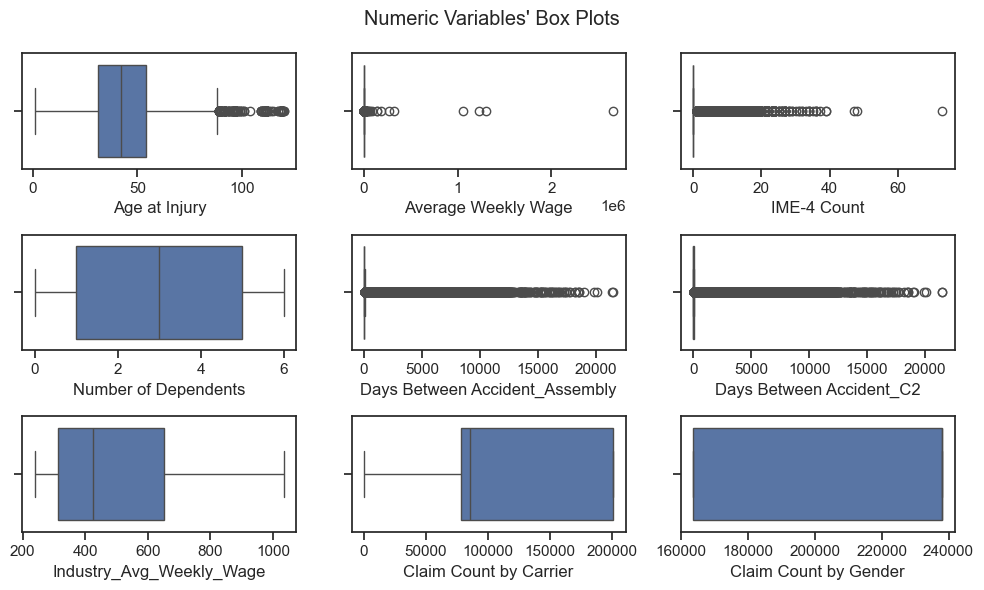

Now we are going to select a threshold to each variable according to its boxplot, percentage of data kept (Rule of Thumb):

In [801]:
filters_manual1 = (
                (X_train["Age at Injury"] <= 90)
                &
                (X_train["Average Weekly Wage"] <= 0.2*1e6)
                &
                (X_train["IME-4 Count"] < 10)                            
                #&
                #(X_train["Number of Dependents"])                        There are no outliers here, so I think there is no manual restriction to make
                # &
                # (X_train["Days Between Accident_Assembly"] <= 2000)
                # &
                # (X_train["Days Between Accident_C2"] <= 2000)
                #&
                #(X_train["Industry_Avg_Weekly_Wage"])                     There are no outliers here, so I think there is no manual restriction to make
                #&
                #(X_train["Claim Count by Carrier"])                     There are no outliers here, so I think there is no manual restriction to make
                #&
                #(X_train["Claim Count by Gender"])                     There are no outliers here, so I think there is no manual restriction to make
)
X_train_out_man = X_train[filters_manual1]
filtered_indices = X_train_out_man.index
y_train = y_train.loc[filtered_indices]

In [ ]:
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_out_man.shape[0] / X_train.shape[0], decimals=5)))

In [ ]:
X_train_out = X_train[(filters_iqr_all | filters_manual1)]            #Only if the 2 filter says that the observation are outliers we remove!
filtered_indices = X_train_out.index
y_train = y_train.loc[filtered_indices]

print('Percentage of data kept after removing outliers:', 100*np.round(X_train_out.shape[0] / X_train.shape[0], 4))

<hr>

<a class="anchor" id="transform">

# 8. Data Transformation - Encoding and Scaling 
</a>

In [ ]:
non_metric_features

In [ ]:
X_val[non_metric_features].head()

In [ ]:
X_train_out[non_metric_features].head()
# 'WCIO Nature of Injury Code_cat'

In [ ]:
test_data[non_metric_features].head()
#'WCIO Cause of Injury_cat'

In [ ]:
X_train_out.dtypes

----------------

<a class="anchor" id="encode">

## 8.1 Feature Encoding
</a>

Label Encoder for target variable (training and validation):

In [818]:
#Initialize Label encoder
label_encoder = LabelEncoder()

#Fit and transform the encoder on the training target variable
Y_train_encoded = label_encoder.fit_transform(y_train)

#Transform validation target variable
Y_val_encoded = label_encoder.transform(y_val)

#Convert the results back to DataFrames
Y_train_encoded_df = pd.DataFrame(Y_train_encoded, columns=['encoded_target'], index=pd.Series(y_train.index))
Y_val_encoded_df = pd.DataFrame(Y_val_encoded, columns=['encoded_target'], index=pd.Series(y_val.index))

In [ ]:
Y_train_encoded_df.head()

In [ ]:
Y_val_encoded_df.head()

One hot encoder for dependent variables (non-metric): (only for training and validation)

In [821]:
X_train_copy = X_train_out.copy()
X_val_copy = X_val.copy()
test_data_copy = test_data.copy()

In [ ]:
X_train_copy.dtypes

In [ ]:
print(X_val.columns)

------------

#### Different encoding strategy - One hot encoder, label encoder, frequency encoder:

In [824]:
# oh_features_to_encode = ["Carrier Type", "County of Injury", "District Name", "Medical Fee Region", "zip_code_cat", "Season_of_Accident", "Alternative Dispute Resolution", "Attorney/Representative", "COVID-19 Indicator", "Gender"]
# frequency_encoder_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code"]

1. ONE HOT ENCODER for low cardinality features:

In [825]:
# # Initialize the encoder with the chosen settings
# ohc = OneHotEncoder(sparse_output=False, drop="first")

# # Fit the encoder on the training set only
# ohc.fit(X_train_copy[oh_features_to_encode])  

# # Transform the training set
# ohc_train_features = ohc.transform(X_train_copy[oh_features_to_encode])
# ohc_train_df = pd.DataFrame(ohc_train_features, index=X_train_copy.index, columns=ohc.get_feature_names_out(oh_features_to_encode))

# # Concatenate the encoded features back to the training set
# X_train_encoded = pd.concat([X_train_copy.drop(columns=oh_features_to_encode), ohc_train_df], axis=1)

# # Transform the validation set using the same encoder (do not fit again)
# ohc_val_features = ohc.transform(X_val_copy[oh_features_to_encode])
# ohc_val_df = pd.DataFrame(ohc_val_features, index=X_val_copy.index, columns=ohc.get_feature_names_out(oh_features_to_encode))

# # Concatenate the encoded features back to the validation set
# X_val_encoded = pd.concat([X_val_copy.drop(columns=oh_features_to_encode), ohc_val_df], axis=1)

# # Transform the test set using the same encoder (do not fit again)
# ohc_test_features = ohc.transform(test_data_copy[oh_features_to_encode])
# ohc_test_df = pd.DataFrame(ohc_test_features, index=test_data_copy.index, columns=ohc.get_feature_names_out(oh_features_to_encode))

# # Concatenate the encoded features back to the test set
# test_data_encoded = pd.concat([test_data_copy.drop(columns=oh_features_to_encode), ohc_test_df], axis=1)

# # Final datasets : X_train_encoded, X_val_encoded, test_data_encoded

 2. Frequency encoder for codes:

In [826]:
# # Create a dictionary to store frequency mappings for each feature
# frequency_encoders = {}

# # Apply Frequency Encoding
# for feature in frequency_encoder_features:
#     # Calculate frequency counts on the training data
#     freq_counts = X_train_copy[feature].value_counts(normalize=True)
    
#     # Store the frequency mapping for future reference
#     frequency_encoders[feature] = freq_counts

#     # Map the frequencies to the training set
#     X_train_copy[feature] = X_train_copy[feature].map(freq_counts)
    
#     # Map the frequencies to the validation set (using the training frequencies)
#     X_val_copy[feature] = X_val_copy[feature].map(freq_counts)
    
#     # Map the frequencies to the test set (using the training frequencies)
#     test_data_copy[feature] = test_data_copy[feature].map(freq_counts)

# # Final datasets:
# # - X_train_copy, X_val_copy, test_data_copy 

In [827]:
# columns_to_add = frequency_encoder_features

# X_train_encoded = X_train_encoded.drop(columns=columns_to_add)
# X_train_encoded = pd.concat([X_train_encoded, X_train_copy[columns_to_add]], axis=1)

# X_val_encoded = X_val_encoded.drop(columns=columns_to_add)
# X_val_encoded = pd.concat([X_val_encoded, X_val_copy[columns_to_add]], axis=1)

# test_data_encoded = test_data_encoded.drop(columns=columns_to_add)
# test_data_encoded = pd.concat([test_data_encoded, test_data_copy[columns_to_add]], axis=1)


In [828]:
# X_train_encoded.shape

In [829]:
# X_val_encoded.shape

In [830]:
# test_data_encoded.shape

In [831]:
# X_train_encoded.describe(include="all").round(2).T

In [832]:
# X_val_encoded.describe(include="all").round(2).T

In [833]:
# test_data_encoded.describe(include="all").round(2).T

In [834]:
# code_features = ['Industry Code',
#  'WCIO Cause of Injury Code',
#  'WCIO Nature of Injury Code',
#  'WCIO Part Of Body Code']
# for feature in code_features:
#     non_metric_features.remove(feature)

In [835]:
# for feature in code_features:
#     metric_features.append(feature)

-----------------

One hot encoder:

In [836]:
# non_metric_features=[ 'Industry Code','Alternative Dispute Resolution',
#  'Attorney/Representative',
#  'Carrier Type',
#  'County of Injury',
#  'COVID-19 Indicator',
#  'District Name',
#  'Gender',
#  'Medical Fee Region',
#  'zip_code_cat',
#  'First Hearing Date Binary',
#  'C-2 Date Bin',
#  'C-3 Date Bin',
#  'Season_of_Accident',
#  'WCIO Cause of Injury Code',
#  'WCIO Nature of Injury Code',
#  'WCIO Part Of Body Code'
#  ]

In [ ]:
X_train_copy.dtypes

In [838]:
X_train_copy[non_metric_features] = X_train_copy[non_metric_features].astype(str)
X_val_copy[non_metric_features] = X_val_copy[non_metric_features].astype(str)
test_data_copy[non_metric_features] = test_data_copy[non_metric_features].astype(str)

In [ ]:
X_train_copy.dtypes

In [840]:
# Initialize the encoder with the chosen settings
ohc = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')

# Fit the encoder on the training set only
ohc.fit(X_train_copy[non_metric_features])  

# Transform the training set
ohc_train_features = ohc.transform(X_train_copy[non_metric_features])
ohc_train_df = pd.DataFrame(ohc_train_features, index=X_train_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the training set
X_train_encoded = pd.concat([X_train_copy.drop(columns=non_metric_features), ohc_train_df], axis=1)

# Transform the validation set using the same encoder (do not fit again)
ohc_val_features = ohc.transform(X_val_copy[non_metric_features])
ohc_val_df = pd.DataFrame(ohc_val_features, index= X_val_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the validation set
X_val_encoded = pd.concat([X_val_copy.drop(columns=non_metric_features), ohc_val_df], axis=1)

# Transform the test set using the same encoder (do not fit again)
ohc_test_features = ohc.transform(test_data_copy[non_metric_features])
ohc_test_df = pd.DataFrame(ohc_test_features, index= test_data_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the test set
test_data_encoded = pd.concat([test_data_copy.drop(columns=non_metric_features), ohc_test_df], axis=1)

In [ ]:
X_train_encoded.dtypes

--------------

1. Conclusions based on Feature Selection for Categorical Features 

- Aggregate

In [842]:
# # Definindo as variáveis categóricas para agrupamento conforme sua lista
# grouped_columns = {
#     'WCIO Nature of Injury Code': [
#         'WCIO Nature of Injury Code_55', 'WCIO Nature of Injury Code_32', 'WCIO Nature of Injury Code_19',
#         'WCIO Nature of Injury Code_69', 'WCIO Nature of Injury Code_38', 'WCIO Nature of Injury Code_47',
#         'WCIO Nature of Injury Code_66', 'WCIO Nature of Injury Code_91', 'WCIO Nature of Injury Code_58',
#         'WCIO Nature of Injury Code_75', 'WCIO Nature of Injury Code_64', 'WCIO Nature of Injury Code_70',
#         'WCIO Nature of Injury Code_76', 'WCIO Nature of Injury Code_79', 'WCIO Nature of Injury Code_22',
#         'WCIO Nature of Injury Code_63', 'WCIO Nature of Injury Code_3', 'WCIO Nature of Injury Code_30',
#         'WCIO Nature of Injury Code_60', 'WCIO Nature of Injury Code_62', 'WCIO Nature of Injury Code_64',
#         'WCIO Nature of Injury Code_67'
#     ],
    
#     'zip_code_cat': [
#         'zip_code_cat_7', 'zip_code_cat_4', 'zip_code_cat_9', 'zip_code_cat_Other', 'zip_code_cat_8',
#         'zip_code_cat_6', 'zip_code_cat_5'
#     ],
    
#     'County of Injury': [
#         'County of Injury_TOMPKINS', 'County of Injury_CATTARAUGUS', 'County of Injury_GENESEE',
#         'County of Injury_TIOGA', 'County of Injury_OTSEGO', 'County of Injury_SCHENECTADY',
#         'County of Injury_LIVINGSTON', 'County of Injury_MADISON', 'County of Injury_ESSEX', 'County of Injury_LEWIS',
#         'County of Injury_STEUBEN', 'County of Injury_ORLEANS', 'County of Injury_FRANKLIN',
#         'County of Injury_ALLEGANY', 'County of Injury_CORTLAND', 'County of Injury_SCHUYLER',
#         'County of Injury_SENECA', 'County of Injury_SCHOHARIE', 'County of Injury_WAYNE',
#         'County of Injury_HAMILTON', 'County of Injury_WYOMING', 'County of Injury_MONTGOMERY',
#         'County of Injury_YATES'
#     ],
    
#     'WCIO Cause of Injury Code': [
#         'WCIO Cause of Injury Code_20', 'WCIO Cause of Injury Code_84', 'WCIO Cause of Injury Code_94',
#         'WCIO Cause of Injury Code_95', 'WCIO Cause of Injury Code_11', 'WCIO Cause of Injury Code_7',
#         'WCIO Cause of Injury Code_65', 'WCIO Cause of Injury Code_4', 'WCIO Cause of Injury Code_91',
#         'WCIO Cause of Injury Code_14', 'WCIO Cause of Injury Code_61', 'WCIO Cause of Injury Code_86',
#         'WCIO Cause of Injury Code_67', 'WCIO Cause of Injury Code_40', 'WCIO Cause of Injury Code_47',
#         'WCIO Cause of Injury Code_8'
#     ],
    
#     'WCIO Part of Body Code': [
#         'WCIO Part Of Body Code_50', 'WCIO Part Of Body Code_46', 'WCIO Part Of Body Code_45',
#         'WCIO Part Of Body Code_24', 'WCIO Part Of Body Code_26', 'WCIO Part Of Body Code_64'
#     ],
    
#     'Carrier Type': [
#         'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS'
#     ]
# }

# # Definindo os datasets para aplicar a agregação
# datasets = {
#     'X_train_encoded': X_train_encoded,
#     'X_val_encoded': X_val_encoded,
#     'test_data_encoded': test_data_encoded
# }

# # Agregação usando o modo (mode) para cada dataset
# for dataset_name, dataset in datasets.items():
#     for group, cols in grouped_columns.items():
#         # Verifica se as colunas do grupo existem no dataset atual
#         existing_cols = [col for col in cols if col in dataset.columns]
        
#         if len(existing_cols) > 1:  # Realiza agregação se houver mais de uma coluna
#             # Calcula o modo para as colunas existentes do grupo
#             dataset[group] = dataset[existing_cols].mode(axis=1)[0]
            
#             # Remove as colunas originais
#             dataset.drop(existing_cols, axis=1, inplace=True)

# # Agora os datasets possuem os valores agregados pelo modo e as colunas originais foram removidas.


- Drop

In [843]:
# #Define columns to drop
# columns_to_drop = [
#     'WCIO Nature of Injury Code_55', 'zip_code_cat_7', 'County of Injury_TOMPKINS', 'County of Injury_CATTARAUGUS',
#     'County of Injury_GENESEE', 'County of Injury_TIOGA', 'WCIO Nature of Injury Code_32', 'County of Injury_OTSEGO',
#     'County of Injury_SCHENECTADY', 'County of Injury_LIVINGSTON', 'WCIO Cause of Injury Code_20',
#     'WCIO Part Of Body Code_50', 'WCIO Nature of Injury Code_19', 'WCIO Cause of Injury Code_3',
#     'County of Injury_MADISON', 'County of Injury_ESSEX', 'County of Injury_LEWIS', 'County of Injury_STEUBEN',
#     'County of Injury_ORLEANS', 'WCIO Cause of Injury Code_84', 'WCIO Cause of Injury Code_94',
#     'WCIO Nature of Injury Code_69', 'County of Injury_FRANKLIN', 'County of Injury_ALLEGANY',
#     'WCIO Cause of Injury Code_95', 'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS', 'County of Injury_CORTLAND',
#     'zip_code_cat_4', 'zip_code_cat_9', 'County of Injury_SCHUYLER', 'WCIO Nature of Injury Code_66',
#     'WCIO Nature of Injury Code_47', 'County of Injury_SENECA', 'WCIO Cause of Injury Code_65',
#     'County of Injury_WAYNE', 'zip_code_cat_Other', 'County of Injury_SCHOHARIE', 'WCIO Part Of Body Code_64',
#     'WCIO Cause of Injury Code_11', 'WCIO Nature of Injury Code_91', 'WCIO Nature of Injury Code_58',
#     'County of Injury_MONTGOMERY', 'WCIO Part Of Body Code_46', 'County of Injury_WYOMING',
#     'County of Injury_HAMILTON', 'Industry Code_21', 'WCIO Part Of Body Code_45', 'WCIO Nature of Injury Code_38',
#     'WCIO Part Of Body Code_26', 'WCIO Part Of Body Code_24', 'WCIO Cause of Injury Code_4', 'WCIO Nature of Injury Code_3',
#     'zip_code_cat_8', 'WCIO Nature of Injury Code_30', 'County of Injury_YATES', 'WCIO Cause of Injury Code_7',
#     'WCIO Nature of Injury Code_75', 'WCIO Cause of Injury Code_91', 'WCIO Cause of Injury Code_14',
#     'WCIO Cause of Injury Code_61', 'zip_code_cat_6', 'WCIO Nature of Injury Code_60', 'WCIO Nature of Injury Code_62',
#     'zip_code_cat_5', 'WCIO Cause of Injury Code_86', 'WCIO Cause of Injury Code_67', 'WCIO Nature of Injury Code_64',
#     'WCIO Nature of Injury Code_70', 'WCIO Nature of Injury Code_67', 'WCIO Cause of Injury Code_8',
#     'WCIO Cause of Injury Code_47', 'WCIO Nature of Injury Code_63', 'WCIO Nature of Injury Code_22',
#     'WCIO Nature of Injury Code_76', 'WCIO Nature of Injury Code_79', 'WCIO Cause of Injury Code_40'
# ]

# X_train_encoded.drop(columns=columns_to_drop, axis=1, inplace=True,errors='ignore')
# X_val_encoded.drop(columns=columns_to_drop, axis=1, inplace=True,errors='ignore')
# test_data_encoded.drop(columns=columns_to_drop, axis=1, inplace=True,errors='ignore')

---------------

<a class="anchor" id="minmax">

## 8.2 Min-max Scaler
</a>

Min-max scaler for dependent variables (metric):

In [ ]:
X_train_out[metric_features].head(10)

In [845]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training set and transform the training features
scaled_feat = scaler.fit_transform(X_train_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_train_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_train_min_max_scaled = pd.concat([X_train_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
X_train_min_max_scaled_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
scaled_feat = scaler.transform(X_val_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_val_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_val_min_max_scaled = pd.concat([X_val_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
X_val_min_max_scaled_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the test set using the same scaler (do not fit again)
scaled_feat = scaler.transform(test_data_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=test_data_copy.index)

# Concatenate the scaled features back to the original DataFrames
test_min_max_scaled = pd.concat([test_data_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
test_min_max_scaled_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)


In [ ]:
X_train_min_max_scaled[metric_features].describe().round(2).T

In [ ]:
X_val_min_max_scaled[metric_features].describe().round(2).T
# Days between accident assembly & days between accident C2 have min values != from zero!! 

In [ ]:
test_min_max_scaled[metric_features].describe().round(2).T
# avg weekly wage max value very different from 1. 

--------------

<a class="anchor" id="std">

## 8.3 Standard Scaler
</a>

Standard scaler for dependent variables (metric):

In [849]:
#Create a StandardScaler instance
standard_scaler = StandardScaler()

#Fit the scaler on the training set and transform the training features
standard_scaled_feat = standard_scaler.fit_transform(X_train_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_train_copy.index)

#Concatenate the scaled features back to the original DataFrames
X_train_std_scaler = pd.concat([X_train_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_train_std_scaler_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

#Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(X_val_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_val_copy.index)

#Concatenate the scaled features back to the original DataFrames
X_val_std_scaler = pd.concat([X_val_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_val_std_scaler_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

#Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(test_data_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=test_data_copy.index)

#Concatenate the scaled features back to the original DataFrames
test_std_scaler = pd.concat([test_data_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_val_std_scaler = pd.concat([X_val_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_test_std_scaler_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

In [ ]:
X_train_std_scaler[metric_features].describe().round(2).T

In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

In [ ]:
X_train_std_scaler_encoded.shape

In [ ]:
X_val_std_scaler_encoded.shape

In [ ]:
X_test_std_scaler_encoded.shape

In [ ]:
X_train_std_scaler_encoded.describe(include="all").round(2).T

-------------------

<a class="anchor" id="robust">

## 8.4 Robust Scaler
</a>

In [857]:
# Create a RobustScaler instance
scaler = RobustScaler()

# Fit the scaler on the training set and transform the training features
scaled_feat = scaler.fit_transform(X_train_copy[metric_features])

# Convert the scaled features back to a DataFrame
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_train_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_train_robust_scaled = pd.concat([X_train_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
X_train_robust_scaled_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
scaled_feat = scaler.transform(X_val_copy[metric_features])

# Convert the scaled features back to a DataFrame
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_val_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_val_robust_scaled = pd.concat([X_val_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
X_val_robust_scaled_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the test set using the same scaler (do not fit again)
scaled_feat = scaler.transform(test_data_copy[metric_features])

# Convert the scaled features back to a DataFrame
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=test_data_copy.index)

# Concatenate the scaled features back to the original DataFrames
test_robust_scaled = pd.concat([test_data_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
test_robust_scaled_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)


In [ ]:
X_train_robust_scaled_encoded.describe(include="all").T

---

 - Comparing the macro F1 score for both scaling methods, we concluded that the Standard Scaler performed better, so we decided to use it.

---

<a class="anchor" id="featselect">

# 9. Feature Selection
</a>

<a class="anchor" id="cat">

## 9.1 Feature Selection - Categorical Features
</a>

In [859]:
# #Defining all the encoded categorical features
# cat_features=[
#        'Industry Code_21', 'Industry Code_22', 'Industry Code_23',
#        'Industry Code_31', 'Industry Code_32', 'Industry Code_33',
#        'Industry Code_42', 'Industry Code_44', 'Industry Code_45',
#        'Industry Code_48', 'Industry Code_49', 'Industry Code_51',
#        'Industry Code_52', 'Industry Code_53', 'Industry Code_54',
#        'Industry Code_55', 'Industry Code_56', 'Industry Code_61',
#        'Industry Code_62', 'Industry Code_71', 'Industry Code_72',
#        'Industry Code_81', 'Industry Code_92',
#        'WCIO Cause of Injury Code_10', 'WCIO Cause of Injury Code_11',
#        'WCIO Cause of Injury Code_12', 'WCIO Cause of Injury Code_13',
#        'WCIO Cause of Injury Code_14', 'WCIO Cause of Injury Code_15',
#        'WCIO Cause of Injury Code_16', 'WCIO Cause of Injury Code_17',
#        'WCIO Cause of Injury Code_18', 'WCIO Cause of Injury Code_19',
#        'WCIO Cause of Injury Code_2', 'WCIO Cause of Injury Code_20',
#        'WCIO Cause of Injury Code_25', 'WCIO Cause of Injury Code_26',
#        'WCIO Cause of Injury Code_27', 'WCIO Cause of Injury Code_28',
#        'WCIO Cause of Injury Code_29', 'WCIO Cause of Injury Code_3',
#        'WCIO Cause of Injury Code_30', 'WCIO Cause of Injury Code_31',
#        'WCIO Cause of Injury Code_32', 'WCIO Cause of Injury Code_33',
#        'WCIO Cause of Injury Code_4', 'WCIO Cause of Injury Code_40',
#        'WCIO Cause of Injury Code_41', 'WCIO Cause of Injury Code_45',
#        'WCIO Cause of Injury Code_46', 'WCIO Cause of Injury Code_47',
#        'WCIO Cause of Injury Code_48', 'WCIO Cause of Injury Code_5',
#        'WCIO Cause of Injury Code_50', 'WCIO Cause of Injury Code_52',
#        'WCIO Cause of Injury Code_53', 'WCIO Cause of Injury Code_54',
#        'WCIO Cause of Injury Code_55', 'WCIO Cause of Injury Code_56',
#        'WCIO Cause of Injury Code_57', 'WCIO Cause of Injury Code_58',
#        'WCIO Cause of Injury Code_59', 'WCIO Cause of Injury Code_6',
#        'WCIO Cause of Injury Code_60', 'WCIO Cause of Injury Code_61',
#        'WCIO Cause of Injury Code_65', 'WCIO Cause of Injury Code_66',
#        'WCIO Cause of Injury Code_67', 'WCIO Cause of Injury Code_68',
#        'WCIO Cause of Injury Code_69', 'WCIO Cause of Injury Code_7',
#        'WCIO Cause of Injury Code_70', 'WCIO Cause of Injury Code_74',
#        'WCIO Cause of Injury Code_75', 'WCIO Cause of Injury Code_76',
#        'WCIO Cause of Injury Code_77', 'WCIO Cause of Injury Code_78',
#        'WCIO Cause of Injury Code_79', 'WCIO Cause of Injury Code_8',
#        'WCIO Cause of Injury Code_80', 'WCIO Cause of Injury Code_81',
#        'WCIO Cause of Injury Code_82', 'WCIO Cause of Injury Code_83',
#        'WCIO Cause of Injury Code_84', 'WCIO Cause of Injury Code_85',
#        'WCIO Cause of Injury Code_86', 'WCIO Cause of Injury Code_87',
#        'WCIO Cause of Injury Code_88', 'WCIO Cause of Injury Code_89',
#        'WCIO Cause of Injury Code_9', 'WCIO Cause of Injury Code_90',
#        'WCIO Cause of Injury Code_91', 'WCIO Cause of Injury Code_93',
#        'WCIO Cause of Injury Code_94', 'WCIO Cause of Injury Code_95',
#        'WCIO Cause of Injury Code_96', 'WCIO Cause of Injury Code_97',
#        'WCIO Cause of Injury Code_98', 'WCIO Cause of Injury Code_99',
#        'WCIO Nature of Injury Code_10', 'WCIO Nature of Injury Code_13',
#        'WCIO Nature of Injury Code_16', 'WCIO Nature of Injury Code_19',
#        'WCIO Nature of Injury Code_2', 'WCIO Nature of Injury Code_22',
#        'WCIO Nature of Injury Code_25', 'WCIO Nature of Injury Code_28',
#        'WCIO Nature of Injury Code_3', 'WCIO Nature of Injury Code_30',
#        'WCIO Nature of Injury Code_31', 'WCIO Nature of Injury Code_32',
#        'WCIO Nature of Injury Code_34', 'WCIO Nature of Injury Code_36',
#        'WCIO Nature of Injury Code_37', 'WCIO Nature of Injury Code_38',
#        'WCIO Nature of Injury Code_4', 'WCIO Nature of Injury Code_40',
#        'WCIO Nature of Injury Code_41', 'WCIO Nature of Injury Code_42',
#        'WCIO Nature of Injury Code_43', 'WCIO Nature of Injury Code_46',
#        'WCIO Nature of Injury Code_47', 'WCIO Nature of Injury Code_49',
#        'WCIO Nature of Injury Code_52', 'WCIO Nature of Injury Code_53',
#        'WCIO Nature of Injury Code_54', 'WCIO Nature of Injury Code_55',
#        'WCIO Nature of Injury Code_58', 'WCIO Nature of Injury Code_59',
#        'WCIO Nature of Injury Code_60', 'WCIO Nature of Injury Code_61',
#        'WCIO Nature of Injury Code_62', 'WCIO Nature of Injury Code_63',
#        'WCIO Nature of Injury Code_64', 'WCIO Nature of Injury Code_65',
#        'WCIO Nature of Injury Code_66', 'WCIO Nature of Injury Code_67',
#        'WCIO Nature of Injury Code_68', 'WCIO Nature of Injury Code_69',
#        'WCIO Nature of Injury Code_7', 'WCIO Nature of Injury Code_70',
#        'WCIO Nature of Injury Code_71', 'WCIO Nature of Injury Code_72',
#        'WCIO Nature of Injury Code_73', 'WCIO Nature of Injury Code_74',
#        'WCIO Nature of Injury Code_75', 'WCIO Nature of Injury Code_76',
#        'WCIO Nature of Injury Code_77', 'WCIO Nature of Injury Code_78',
#        'WCIO Nature of Injury Code_79', 'WCIO Nature of Injury Code_80',
#        'WCIO Nature of Injury Code_83', 'WCIO Nature of Injury Code_90',
#        'WCIO Nature of Injury Code_91', 'WCIO Part Of Body Code_11',
#        'WCIO Part Of Body Code_12', 'WCIO Part Of Body Code_13',
#        'WCIO Part Of Body Code_14', 'WCIO Part Of Body Code_15',
#        'WCIO Part Of Body Code_16', 'WCIO Part Of Body Code_17',
#        'WCIO Part Of Body Code_18', 'WCIO Part Of Body Code_19',
#        'WCIO Part Of Body Code_20', 'WCIO Part Of Body Code_21',
#        'WCIO Part Of Body Code_22', 'WCIO Part Of Body Code_23',
#        'WCIO Part Of Body Code_24', 'WCIO Part Of Body Code_25',
#        'WCIO Part Of Body Code_26', 'WCIO Part Of Body Code_30',
#        'WCIO Part Of Body Code_31', 'WCIO Part Of Body Code_32',
#        'WCIO Part Of Body Code_33', 'WCIO Part Of Body Code_34',
#        'WCIO Part Of Body Code_35', 'WCIO Part Of Body Code_36',
#        'WCIO Part Of Body Code_37', 'WCIO Part Of Body Code_38',
#        'WCIO Part Of Body Code_39', 'WCIO Part Of Body Code_40',
#        'WCIO Part Of Body Code_41', 'WCIO Part Of Body Code_42',
#        'WCIO Part Of Body Code_43', 'WCIO Part Of Body Code_44',
#        'WCIO Part Of Body Code_45', 'WCIO Part Of Body Code_46',
#        'WCIO Part Of Body Code_47', 'WCIO Part Of Body Code_48',
#        'WCIO Part Of Body Code_49', 'WCIO Part Of Body Code_50',
#        'WCIO Part Of Body Code_51', 'WCIO Part Of Body Code_52',
#        'WCIO Part Of Body Code_53', 'WCIO Part Of Body Code_54',
#        'WCIO Part Of Body Code_55', 'WCIO Part Of Body Code_56',
#        'WCIO Part Of Body Code_57', 'WCIO Part Of Body Code_58',
#        'WCIO Part Of Body Code_60', 'WCIO Part Of Body Code_61',
#        'WCIO Part Of Body Code_62', 'WCIO Part Of Body Code_63',
#        'WCIO Part Of Body Code_64', 'WCIO Part Of Body Code_65',
#        'WCIO Part Of Body Code_66', 'WCIO Part Of Body Code_90',
#        'WCIO Part Of Body Code_91', 'WCIO Part Of Body Code_99',
#        'Alternative Dispute Resolution_Y', 'Attorney/Representative_Y',
#        'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC',
#        'Carrier Type_4A. SELF PRIVATE',
#        'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
#        'Carrier Type_5D. SPECIAL FUND - UNKNOWN',
#        'County of Injury_ALLEGANY', 'County of Injury_BRONX',
#        'County of Injury_BROOME', 'County of Injury_CATTARAUGUS',
#        'County of Injury_CAYUGA', 'County of Injury_CHAUTAUQUA',
#        'County of Injury_CHEMUNG', 'County of Injury_CHENANGO',
#        'County of Injury_CLINTON', 'County of Injury_COLUMBIA',
#        'County of Injury_CORTLAND', 'County of Injury_DELAWARE',
#        'County of Injury_DUTCHESS', 'County of Injury_ERIE',
#        'County of Injury_ESSEX', 'County of Injury_FRANKLIN',
#        'County of Injury_FULTON', 'County of Injury_GENESEE',
#        'County of Injury_GREENE', 'County of Injury_HAMILTON',
#        'County of Injury_HERKIMER', 'County of Injury_JEFFERSON',
#        'County of Injury_KINGS', 'County of Injury_LEWIS',
#        'County of Injury_LIVINGSTON', 'County of Injury_MADISON',
#        'County of Injury_MONROE', 'County of Injury_MONTGOMERY',
#        'County of Injury_NASSAU', 'County of Injury_NEW YORK',
#        'County of Injury_NIAGARA', 'County of Injury_ONEIDA',
#        'County of Injury_ONONDAGA', 'County of Injury_ONTARIO',
#        'County of Injury_ORANGE', 'County of Injury_ORLEANS',
#        'County of Injury_OSWEGO', 'County of Injury_OTSEGO',
#        'County of Injury_PUTNAM', 'County of Injury_QUEENS',
#        'County of Injury_RENSSELAER', 'County of Injury_RICHMOND',
#        'County of Injury_ROCKLAND', 'County of Injury_SARATOGA',
#        'County of Injury_SCHENECTADY', 'County of Injury_SCHOHARIE',
#        'County of Injury_SCHUYLER', 'County of Injury_SENECA',
#        'County of Injury_ST. LAWRENCE', 'County of Injury_STEUBEN',
#        'County of Injury_SUFFOLK', 'County of Injury_SULLIVAN',
#        'County of Injury_TIOGA', 'County of Injury_TOMPKINS',
#        'County of Injury_ULSTER', 'County of Injury_WARREN',
#        'County of Injury_WASHINGTON', 'County of Injury_WAYNE',
#        'County of Injury_WESTCHESTER', 'County of Injury_WYOMING',
#        'County of Injury_YATES', 'COVID-19 Indicator_Y',
#        'District Name_BINGHAMTON', 'District Name_BUFFALO',
#        'District Name_HAUPPAUGE', 'District Name_NYC',
#        'District Name_ROCHESTER', 'District Name_STATEWIDE',
#        'District Name_SYRACUSE', 'Gender_M', 'Medical Fee Region_II',
#        'Medical Fee Region_III', 'Medical Fee Region_IV',
#        'zip_code_cat_1', 'zip_code_cat_2', 'zip_code_cat_3',
#        'zip_code_cat_4', 'zip_code_cat_5', 'zip_code_cat_6',
#        'zip_code_cat_7', 'zip_code_cat_8', 'zip_code_cat_9',
#        'zip_code_cat_Other', 'First Hearing Date Binary_1',
#        'C-2 Date Bin_1', 'C-3 Date Bin_1', 'Season_of_Accident_Spring',
#        'Season_of_Accident_Summer', 'Season_of_Accident_Winter']

-------------------

<a class="anchor" id="filter">

### 9.1.1 Filter Methods
</a>

<a class="anchor" id="chi">

#### 9.1.1.1 Chi-Square
</a>

In [860]:
# cat_features=X_train_copy[non_metric_features]

- Define a function that will test whether a categorical independent variable (var) is an important predictor for the target using the Chi-Square test of independence.

    It prints whether the variable is important or not for prediction based on the Chi-Square test.
 

In [861]:
# def TestIndependence(X, y, var, alpha=0.05):
#     # Create a contingency table to observe the relationship between the target variable y and the feature X
#     dfObserved = pd.crosstab(y, X) 
    
#     # Perform the Chi-Square test of independence on the contingency table
#     chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
#     # Create a DataFrame for the expected values from the Chi-Square test
#     dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    
#     # Display the chi-square statistic and p-value
#     print(f"Chi-Square Score for {var}: {chi2:.4f}")
#     print(f"P-Value for {var}: {p:.4f}")
    
#     # Check if the p-value is smaller than the alpha level to determine importance
#     if p < alpha:
#         result = f"{var} is IMPORTANT for Prediction"
#     else:
#         result = f"{var} is NOT an important predictor. (Discard {var} from model)"
    
#     print(result)
#     print('-'*50)

#     return chi2, p
# #Run the function throughout the categorical variables
# for var in cat_features:
#     TestIndependence(X_train_encoded[var],Y_train_encoded, var)


<a class="anchor" id="cramer">

#### 9.1.1.2 Cramér's V
</a>

**Cramér's V values:**

- 0 to 0.1: Weak or insignificant association.
- 0.1 to 0.3: Moderate association.
- 0.3 to 0.5: Strong association.
- Above 0.5: Very strong association (potentially redundant).

In [862]:
# def cramers_v(x, y):
#     contingency_table = pd.crosstab(x, y)
#     chi2, _, _, _ = chi2_contingency(contingency_table)
#     n = contingency_table.sum().sum()
#     k = min(contingency_table.shape)
#     v = np.sqrt(chi2 / (n * (k - 1)))
   
#     return v
# for var in cat_features:
#     v = cramers_v(X_train_encoded[var], Y_train_encoded)
#     print(f"{var}: Cramér's V = {v:.4f}")

<a class="anchor" id="mi">

#### 9.1.1.3 Mutual Information
</a>

In [863]:
# # Mutual Information
# mi = mutual_info_classif( X_train_encoded[cat_features], Y_train_encoded)

# for var, score in zip( X_train_encoded[cat_features].columns, mi):
#     print(f"{var}: MI = {score:.4f}")

----------------


<a class="anchor" id="emb">

### 9.1.2 Embedded Methods
</a>

<a class="anchor" id="rf">

#### 9.1.2.1 Random Forest Feature Importance
</a>

In [864]:
# # Random Forest
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# rf_model.fit(X_train_encoded[cat_features], Y_train_encoded)

# # Features importance
# feature_importances = rf_model.feature_importances_

# # DF to display the results
# feature_importances_df = pd.DataFrame({
#      'Feature': cat_features,
#      'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# #Display important features
# print(feature_importances_df)

<a class="anchor" id="dt">

#### 9.1.2.2 Decision Tree
</a>

In [865]:
# # Decision Tree Classifier
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train_encoded[cat_features], Y_train_encoded)

# # Let's get the features' importances
# feature_importances = model.feature_importances_

# # Creating a dataframe to visualize the importances
# feature_importance_df = pd.DataFrame({
#     'Feature': cat_features,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# print(feature_importance_df)

# # We are going to define the threshold for the importances
# threshold = 0.1
# selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
# print("\nSelected Features:")
# print(selected_features.tolist())

<a class="anchor" id="cb">

#### 9.1.2.3 Catboost
</a>

In [866]:
# # Train a CatBoost model
# catboost_model = CatBoostClassifier(random_state=42, verbose=0)
# catboost_model.fit(X_train_encoded[cat_features], Y_train_encoded)

# # Get feature importances
# feature_importances = catboost_model.get_feature_importance()

# # Create a DataFrame to view the results
# feature_importances_df = pd.DataFrame({
#     'Feature': cat_features,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# # Display top features
# print(feature_importances_df)

---------------

<a class="anchor" id="all">

### 9.1.3 Analysis of all the methods
</a>

- Create a dataframe where all of the outputs of the encoded variables are display.

- Normalize the outputs, using MinMaxScaler

- Calculate the average importance of each variable

In [867]:
# # Create df to contain all the information
# feature_scores = pd.DataFrame()
# feature_scores['Feature'] = cat_features  # Use cat_features to only include categorical variables

# # Placeholder for the importances of each method
# methods = ['ChiSquare', 'CramersV', 'MutualInfo', 'RandomForest', 'DecisionTree', 'CatBoost']
# for method in methods:
#     feature_scores[method] = 0  

# # 1. Chi-Square
# chi_square_scores = []
# for var in cat_features:  # Only loop through categorical features
#     # Create a contingency table to observe the relationship between the target variable and the feature
#     dfObserved = pd.crosstab(Y_train_encoded, X_train_encoded[var])
#     chi2, _, _, _ = stats.chi2_contingency(dfObserved.values)
#     chi_square_scores.append(chi2)
# # Apply MinMaxScaler to normalize the Chi-Square scores
# feature_scores['ChiSquare'] = MinMaxScaler().fit_transform(np.array(chi_square_scores).reshape(-1, 1))

# # 2. Cramér's V
# cramers_v_scores = []
# for var in cat_features:  # Only loop through categorical features
#     # Calculate Cramér's V statistic
#     v = cramers_v(X_train_encoded[var], Y_train_encoded)
#     cramers_v_scores.append(v)
# # Apply MinMaxScaler to normalize the Cramér's V scores
# feature_scores['CramersV'] = MinMaxScaler().fit_transform(np.array(cramers_v_scores).reshape(-1, 1))

# # 3. Mutual Information
# # Calculate Mutual Information between each categorical feature and the target variable
# mi = mutual_info_classif(X_train_encoded[cat_features], Y_train_encoded)  # Only pass categorical features
# # Apply MinMaxScaler to normalize the Mutual Information scores
# feature_scores['MutualInfo'] = MinMaxScaler().fit_transform(mi.reshape(-1, 1))

# # 4. Random Forest
# # Fit a Random Forest model to the categorical features
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# rf_model.fit(X_train_encoded[cat_features], Y_train_encoded)  # Only use categorical features
# # Apply MinMaxScaler to normalize the feature importances from the Random Forest model
# feature_scores['RandomForest'] = MinMaxScaler().fit_transform(rf_model.feature_importances_.reshape(-1, 1))

# # 5. Decision Tree
# # Fit a Decision Tree model to the categorical features
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train_encoded[cat_features], Y_train_encoded)  # Only use categorical features
# # Apply MinMaxScaler to normalize the feature importances from the Decision Tree model
# feature_scores['DecisionTree'] = MinMaxScaler().fit_transform(dt_model.feature_importances_.reshape(-1, 1))

# # 6. CatBoost
# # Fit a CatBoost model to the categorical features
# catboost_model = CatBoostClassifier(random_state=42, verbose=0)
# catboost_model.fit(X_train_encoded[cat_features], Y_train_encoded)  # Only use categorical features
# # Apply MinMaxScaler to normalize the feature importances from the CatBoost model
# feature_scores['CatBoost'] = MinMaxScaler().fit_transform(catboost_model.get_feature_importance().reshape(-1, 1))

# # Combine the Importances
# # Calculate the average importance across all methods
# feature_scores['AverageImportance'] = feature_scores[methods].mean(axis=1)

# # Order by Importance
# # Sort features by the average importance, in descending order
# final_features = feature_scores.sort_values(by='AverageImportance', ascending=False)

In [868]:
# final_features

In [869]:
# # Save DataFrame to CSV
# file_path = "final_features.csv" 
# final_features.to_csv(file_path, index=False) 

# print(f"DataFrame saved to {file_path}")

- Calculate the Q1 of the averages to define the threshold

In [870]:
# # Determine the threshold to consider a feature individually
# avg_importance = final_features['AverageImportance']

# percentiles = avg_importance.quantile([0.25, 0.5, 0.75])
# print("Percentiles:")
# print(percentiles)

# summary_stats = avg_importance.describe()
# print("\nStatistical Summary:")
# print(summary_stats)

# low_importance_threshold_avg = percentiles[0.25]  
# print(f"\nSuggested: Aggregate variables with 'AverageImportance' below {low_importance_threshold_avg:.4f}")

In [871]:
# # See the features below the threshold
# filter_column = 'AverageImportance' 
# limit = low_importance_threshold_avg
# features = 'Feature' 

# filtered_values = final_features[final_features[filter_column ] < limit ][features]

# print(filtered_values )

- Aggregate or Drop the selected categorical features based on Feature Selection Methods
- This conclusions are based on applying ohc to all features

- ### Agregate

In [872]:
# # Definindo as variáveis categóricas para agrupamento conforme sua lista
# grouped_columns = {
#     'WCIO Nature of Injury Code': [
#         'WCIO Nature of Injury Code_55', 'WCIO Nature of Injury Code_32', 'WCIO Nature of Injury Code_19',
#         'WCIO Nature of Injury Code_69', 'WCIO Nature of Injury Code_38', 'WCIO Nature of Injury Code_47',
#         'WCIO Nature of Injury Code_66', 'WCIO Nature of Injury Code_91', 'WCIO Nature of Injury Code_58',
#         'WCIO Nature of Injury Code_75', 'WCIO Nature of Injury Code_64', 'WCIO Nature of Injury Code_70',
#         'WCIO Nature of Injury Code_76', 'WCIO Nature of Injury Code_79', 'WCIO Nature of Injury Code_22',
#         'WCIO Nature of Injury Code_63', 'WCIO Nature of Injury Code_3', 'WCIO Nature of Injury Code_30',
#         'WCIO Nature of Injury Code_60', 'WCIO Nature of Injury Code_62', 'WCIO Nature of Injury Code_64',
#         'WCIO Nature of Injury Code_67'
#     ],
    
#     'zip_code_cat': [
#         'zip_code_cat_7', 'zip_code_cat_4', 'zip_code_cat_9', 'zip_code_cat_Other', 'zip_code_cat_8',
#         'zip_code_cat_6', 'zip_code_cat_5'
#     ],
    
#     'County of Injury': [
#         'County of Injury_TOMPKINS', 'County of Injury_CATTARAUGUS', 'County of Injury_GENESEE',
#         'County of Injury_TIOGA', 'County of Injury_OTSEGO', 'County of Injury_SCHENECTADY',
#         'County of Injury_LIVINGSTON', 'County of Injury_MADISON', 'County of Injury_ESSEX', 'County of Injury_LEWIS',
#         'County of Injury_STEUBEN', 'County of Injury_ORLEANS', 'County of Injury_FRANKLIN',
#         'County of Injury_ALLEGANY', 'County of Injury_CORTLAND', 'County of Injury_SCHUYLER',
#         'County of Injury_SENECA', 'County of Injury_SCHOHARIE', 'County of Injury_WAYNE',
#         'County of Injury_HAMILTON', 'County of Injury_WYOMING', 'County of Injury_MONTGOMERY',
#         'County of Injury_YATES'
#     ],
    
#     'WCIO Cause of Injury Code': [
#         'WCIO Cause of Injury Code_20', 'WCIO Cause of Injury Code_84', 'WCIO Cause of Injury Code_94',
#         'WCIO Cause of Injury Code_95', 'WCIO Cause of Injury Code_11', 'WCIO Cause of Injury Code_7',
#         'WCIO Cause of Injury Code_65', 'WCIO Cause of Injury Code_4', 'WCIO Cause of Injury Code_91',
#         'WCIO Cause of Injury Code_14', 'WCIO Cause of Injury Code_61', 'WCIO Cause of Injury Code_86',
#         'WCIO Cause of Injury Code_67', 'WCIO Cause of Injury Code_40', 'WCIO Cause of Injury Code_47',
#         'WCIO Cause of Injury Code_8'
#     ],
    
#     'WCIO Part of Body Code': [
#         'WCIO Part Of Body Code_50', 'WCIO Part Of Body Code_46', 'WCIO Part Of Body Code_45',
#         'WCIO Part Of Body Code_24', 'WCIO Part Of Body Code_26', 'WCIO Part Of Body Code_64'
#     ],
    
#     'Carrier Type': [
#         'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS'
#     ]
# }

# # Definindo os datasets para aplicar a agregação
# datasets = {
#     'X_train': X_train,
#     'X_val': X_val,
#     'test_data': test_data
# }

# # Agregação usando o modo (mode) para cada dataset
# for dataset_name, dataset in datasets.items():
#     for group, cols in grouped_columns.items():
#         # Verifica se as colunas do grupo existem no dataset atual
#         existing_cols = [col for col in cols if col in dataset.columns]
        
#         if len(existing_cols) > 1:  # Realiza agregação se houver mais de uma coluna
#             # Calcula o modo para as colunas existentes do grupo
#             dataset[group] = dataset[existing_cols].mode(axis=1)[0]
            
#             # Remove as colunas originais
#             dataset.drop(existing_cols, axis=1, inplace=True)

# # Agora os datasets possuem os valores agregados pelo modo e as colunas originais foram removidas.


- ### Drop

In [873]:
# # Define columns to drop
# columns_to_drop = [
#     'WCIO Nature of Injury Code_55', 'zip_code_cat_7', 'County of Injury_TOMPKINS', 'County of Injury_CATTARAUGUS',
#     'County of Injury_GENESEE', 'County of Injury_TIOGA', 'WCIO Nature of Injury Code_32', 'County of Injury_OTSEGO',
#     'County of Injury_SCHENECTADY', 'County of Injury_LIVINGSTON', 'WCIO Cause of Injury Code_20',
#     'WCIO Part Of Body Code_50', 'WCIO Nature of Injury Code_19', 'WCIO Cause of Injury Code_3',
#     'County of Injury_MADISON', 'County of Injury_ESSEX', 'County of Injury_LEWIS', 'County of Injury_STEUBEN',
#     'County of Injury_ORLEANS', 'WCIO Cause of Injury Code_84', 'WCIO Cause of Injury Code_94',
#     'WCIO Nature of Injury Code_69', 'County of Injury_FRANKLIN', 'County of Injury_ALLEGANY',
#     'WCIO Cause of Injury Code_95', 'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS', 'County of Injury_CORTLAND',
#     'zip_code_cat_4', 'zip_code_cat_9', 'County of Injury_SCHUYLER', 'WCIO Nature of Injury Code_66',
#     'WCIO Nature of Injury Code_47', 'County of Injury_SENECA', 'WCIO Cause of Injury Code_65',
#     'County of Injury_WAYNE', 'zip_code_cat_Other', 'County of Injury_SCHOHARIE', 'WCIO Part Of Body Code_64',
#     'WCIO Cause of Injury Code_11', 'WCIO Nature of Injury Code_91', 'WCIO Nature of Injury Code_58',
#     'County of Injury_MONTGOMERY', 'WCIO Part Of Body Code_46', 'County of Injury_WYOMING',
#     'County of Injury_HAMILTON', 'Industry Code_21', 'WCIO Part Of Body Code_45', 'WCIO Nature of Injury Code_38',
#     'WCIO Part Of Body Code_26', 'WCIO Part Of Body Code_24', 'WCIO Cause of Injury Code_4', 'WCIO Nature of Injury Code_3',
#     'zip_code_cat_8', 'WCIO Nature of Injury Code_30', 'County of Injury_YATES', 'WCIO Cause of Injury Code_7',
#     'WCIO Nature of Injury Code_75', 'WCIO Cause of Injury Code_91', 'WCIO Cause of Injury Code_14',
#     'WCIO Cause of Injury Code_61', 'zip_code_cat_6', 'WCIO Nature of Injury Code_60', 'WCIO Nature of Injury Code_62',
#     'zip_code_cat_5', 'WCIO Cause of Injury Code_86', 'WCIO Cause of Injury Code_67', 'WCIO Nature of Injury Code_64',
#     'WCIO Nature of Injury Code_70', 'WCIO Nature of Injury Code_67', 'WCIO Cause of Injury Code_8',
#     'WCIO Cause of Injury Code_47', 'WCIO Nature of Injury Code_63', 'WCIO Nature of Injury Code_22',
#     'WCIO Nature of Injury Code_76', 'WCIO Nature of Injury Code_79', 'WCIO Cause of Injury Code_40'
# ]


# X_train.drop(columns=columns_to_drop, axis=1, inplace=True,errors='ignore')
# X_val.drop(columns=columns_to_drop, axis=1, inplace=True,errors='ignore')
# test_data.drop(columns=columns_to_drop, axis=1, inplace=True,errors='ignore')

-------------

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Use spearman correlation 
corr = X_train_out[metric_features].corr(method="spearman").round(3)

# Plot heatmap
sns.heatmap(data=corr, annot=True, 
            # fmt='s',
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

<a class="anchor" id="numfeat">

## 9.2 Feature Selection - Numerical Features
</a>

<a class="anchor" id="wrapper">

### 9.2.1 Wrapper Methods
</a>

<a class="anchor" id="rfe">

#### 9.2.1.1 RFE
</a>

In [875]:
# model1 = LogisticRegression()

In [876]:
# rfe = RFE(estimator=model1, n_features_to_select=3)     
# rfe

In [877]:
# X_train_std_scaler_num = X_train_std_scaler[metric_features]
# X_val_std_scaler_num = X_val_std_scaler[metric_features]

# X_train_std_scaler_num.head()

In [878]:
# X_rfe = rfe.fit_transform(X_train_std_scaler_num, Y_train_encoded)

In [879]:
# rfe.support_

In [880]:
# rfe.ranking_

In [881]:
# selected_features = pd.Series(rfe.support_, index = X_train_std_scaler_num.columns)         #If it says True we should keep that feature
# selected_features

Now let's see the optimum value for the number of features selected, to get the higher score

In [882]:
# from sklearn.metrics import f1_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# # Nº of features
# nof_list = np.arange(1, 10)
# high_score = 0
# nof = 0
# train_score_list = []
# val_score_list = []

# for n in range(len(nof_list)):
#     model = LogisticRegression()
    
#     rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    
#     X_train_rfe = rfe.fit_transform(X_train_std_scaler_num, Y_train_encoded)
#     X_val_rfe = rfe.transform(X_val_std_scaler_num)
    
#     model.fit(X_train_rfe, Y_train_encoded)
    
#     # Calculate f1_macro for training data
#     y_train_pred = model.predict(X_train_rfe)
#     train_score = f1_score(Y_train_encoded, y_train_pred, average='macro')
#     train_score_list.append(train_score)
   
#     # Calculate f1_macro for validation data
#     y_val_pred = model.predict(X_val_rfe)
#     val_score = f1_score(Y_val_encoded, y_val_pred, average='macro')
#     val_score_list.append(val_score)
    
#     # Check best score
#     if val_score > high_score:
#         high_score = val_score
#         nof = nof_list[n]
#         best_model = model
#         best_rfe = rfe
        
# print(f"Optimum number of features: {nof}")
# print(f"F1-macro score with {nof} features: {high_score:.4f}")

# # Get selected features
# features_to_select = pd.Series(best_rfe.support_, index=X_train_std_scaler_num.columns)
# selected_features = features_to_select[features_to_select].index.tolist()
# print(f"Selected features:\n{selected_features}")

# # Feature ranking
# feature_ranking = pd.Series(best_rfe.ranking_, index=X_train_std_scaler_num.columns)
# print(f"\nFeature ranking (lower is better):\n{feature_ranking}")

# # Plot train and validation scores
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(nof_list, train_score_list, label='Training F1-macro')
# plt.plot(nof_list, val_score_list, label='Validation F1-macro')
# plt.xlabel('Number of Features')
# plt.ylabel('F1-macro Score')
# plt.title('F1-macro Score vs Number of Features')
# plt.legend()
# plt.show()

Using another classifier, to analyse the score

In [884]:
# nof_list = np.arange(1,10)            
# high_score = 0
# nof = 0           
# train_score_list = []
# val_score_list = []

# for n in range(len(nof_list)):
#     model = RandomForestClassifier(random_state=27)
    
#     rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
   
#     X_train_rfe = rfe.fit_transform(X_train_std_scaler_num, Y_train_encoded)
#     X_val_rfe = rfe.transform(X_val_std_scaler_num)
   
#     model.fit(X_train_rfe, Y_train_encoded)
    
#     # Predict on training and validation sets
#     train_pred = model.predict(X_train_rfe)
#     val_pred = model.predict(X_val_rfe)
    
#     # Calculate F1 scores
#     train_score = f1_score(Y_train_encoded, train_pred, average='weighted')
#     train_score_list.append(train_score)
    
#     val_score = f1_score(Y_val_encoded, val_pred, average='weighted')
#     val_score_list.append(val_score)
   
#     if(val_score > high_score):
#         high_score = val_score
#         nof = nof_list[n]
#         features_to_select = pd.Series(rfe.support_, index=X_train_std_scaler_num.columns)
      
# print("Optimum number of features: %d" %nof)
# print(f"Features to select: \n{features_to_select}")

------------

<a class="anchor" id="embedded">

### 9.2.2 Embedded Methods
</a>

<a class="anchor" id="lasso">

#### 9.2.2.1 Lasso Regression
</a>

In [887]:
# def plot_importance(coef,name):
#     imp_coef = coef.sort_values()
#     plt.figure(figsize=(8,6))
#     imp_coef.plot(kind = "barh")
#     plt.title("Feature importance using " + name + " Model")
#     plt.show()

In [888]:
# reg = LassoCV(eps=0.001)      #Depending of the strength of the eps, we can get rid of some variables

In [889]:
# reg.fit(X_train_std_scaler_num, Y_train_encoded)

In [890]:
# coef = pd.Series(reg.coef_, index=X_train_std_scaler_num.columns)
# coef

In [891]:
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [892]:
# coef.sort_values()

In [893]:
# plot_importance(coef.sort_values(),'Lasso')


<a class="anchor" id="rm_num">

#### 9.2.2.2 Random Forest Feature Importance
</a>

In [894]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score

# # Initialize the Random Forest Feature Importance
# rfc = RandomForestClassifier(n_estimators=100, random_state=27)
# rfc.fit(X_train_std_scaler_num, Y_train_encoded)

# importances = rfc.feature_importances_  
# feature_names = X_train_std_scaler_num.columns

# indices = np.argsort(importances)[::-1]
# sorted_importances = importances[indices]
# sorted_feature_names = feature_names[indices]

# plt.figure(figsize=(10, 6))
# plt.title("Feature Importances")
# plt.bar(range(len(importances)), sorted_importances)
# plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
# plt.tight_layout()
# plt.show()

# for i, feature in enumerate(sorted_feature_names):
#     print(f"{i+1}) {feature}: {sorted_importances[i]:.4f}")

Based on this importances, we chose the features that has its value over 0.1

----------

<a class="anchor" id="filter_num">

### 9.2.3 Filter Methods
</a>

<a class="anchor" id="uni">

#### 9.2.3.1 Univariate Variables
</a>

In [895]:
# metric_features_ = [col for col in metric_features if col in X_train.columns]

In [896]:
# X_train[metric_features_].var()

Since neither of the variables are univariate (variance=0), we will not dicard any of the variables based on this method.

<a class="anchor" id="select">

#### 9.2.3.2 Select K Best Method
</a>

In [897]:
# # Initialize SelectKBest with f_regression as the scoring function
# selector = SelectKBest(score_func=f_regression, k=8)        #Manual Adjusted and Optimized k

In [898]:
# selector.fit(X_train_std_scaler_num, Y_train_encoded)

In [899]:
# scores = pd.Series(selector.scores_, index=X_train_std_scaler_num.columns)

In [900]:
# def plot_importance_kbest(scores, name):
#     plt.figure(figsize=(8, 6))
#     scores.plot(kind="barh")
#     plt.title("Feature importance using " + name + " Method")
#     plt.show()

In [901]:
# plot_importance_kbest(scores.sort_values(), 'SelectKBest')

--------------------

<a class="anchor" id="hybrid">

### 9.2.4 Hybrid Methods
</a>

<a class="anchor" id="graph">

#### 9.2.4.1 Graph-based Automatic Feature selection
</a>

In [902]:
# import numpy as np
# import networkx as nx
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# def create_feature_graph(X):
#     G = nx.Graph()
#     n_features = X.shape[1]
#     if n_features == 1:
#         G.add_node(0)
#         return G
#     for i in range(n_features):
#         for j in range(i+1, n_features):
#             correlation = np.abs(np.corrcoef(X[:, i], X[:, j])[0, 1])
#             G.add_edge(i, j, weight=correlation)
#     return G

# def calculate_macro_f1(X, y, selected_features):
#     clf = RandomForestClassifier(random_state=42)
#     scores = cross_val_score(clf, X[:, selected_features], y, cv=5, scoring='f1_macro')
#     return scores.mean()

# def gb_afs_macro_f1(X, y):
#     X = np.array(X)
#     y = np.array(y)
    
#     if X.ndim == 1:
#         X = X.reshape(-1, 1)
#     elif X.ndim > 2:
#         raise ValueError("Input X must be a 1D or 2D array")

#     # Ensure X and y have the same number of samples
#     if len(X) != len(y):
#         min_samples = min(len(X), len(y))
#         X = X[:min_samples]
#         y = y[:min_samples]
#         print(f"Warning: X and y had different lengths. Using first {min_samples} samples.")
    
#     G = create_feature_graph(X)
#     selected_features = set(G.nodes())
#     best_score = calculate_macro_f1(X, y, list(selected_features))
    
#     while len(selected_features) > 1:
#         scores = []
#         for feature in selected_features:
#             temp_features = list(selected_features - {feature})
#             score = calculate_macro_f1(X, y, temp_features)
#             scores.append((feature, score))
        
#         feature_to_remove, new_score = max(scores, key=lambda x: x[1])
        
#         if new_score > best_score:
#             selected_features.remove(feature_to_remove)
#             best_score = new_score
#         else:
#             break
    
#     return list(selected_features), best_score

# # Usage
# optimal_features, best_f1_score = gb_afs_macro_f1(X_train_std_scaler_num, Y_train_encoded)

# print(f"Optimal number of features: {len(optimal_features)}")
# print(f"Selected features: {optimal_features}")
# print(f"Best macro F1 score: {best_f1_score:.4f}")

<hr>

| Predictor | Spearman | RFE LR | RFE RandForest | Lasso | SelectKBest | RandForest Feat. Imp. | Graph-based Aut. Feat. Sel. | What to do? |
|-----------|----------|--------|----------------|-------|-------------|----------------------|----------------------------|-------------|
| Age at Injury | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Include in the Model |
| Average Weekly Wage | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Include in the Model |
| IME-4 Count | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Include in the Model |
| Number of Dependents | Keep | Discard | Keep | Discard | Discard | Discard | Keep | Discard in the Model |
| Days Between_Assembly | Either this or Accident_C2 | Keep | Keep | Keep | Discard | Keep | Keep | Include in the Model |
| Days Between C2 | Either this or Accident_Assembly | Keep | Keep | Keep | Discard | Keep | Keep | Include in the Model |
| Claim Count by Carrier | Keep | Keep | Keep | Keep | Keep | Discard | Keep | Include in the Model |
| Industry_Avg_Weekly_Wage | Keep | Keep | Keep | Keep | Keep | Discard | Keep | Include in the Model |
| Claim Count by Gender | Keep | Keep | Keep | Keep | Keep | Discard | Keep | Include in the Model |


<hr>

Now let's make the conclusion of the Variables:

----

<a class="anchor" id="dropfeat">

### 9.3 Drop Numerical Features according to Feature Selections
</a>

We have checked the performance of our models firsly by deleting Days Between Accident_assembly and later by deleting Days Betweem Accident_C2. Our model performed better without Days Between Accident_C2 so we decided to keep Days Between Accident_Assembly.

In [903]:
# X_train_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_C2"], inplace=True)
# X_val_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_C2"], inplace=True)
# X_test_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_C2"], inplace=True)

In [904]:
# X_train = X_train_std_scaler_encoded
# y_train = y_train

# X_val = X_val_std_scaler_encoded
# y_val = y_val

-----------

<a class="anchor" id='Proprocessed'>

# 10. Save Proprocessed Data
</a>

Saving the target variable back into the preprocessed dataset

* Saving using one-hot encoder and standard scaler (label encoder for target variable)

In [905]:
train_encoded_df_s = pd.concat([X_train_std_scaler_encoded, y_train], axis=1)
train_encoded_df_s.to_csv("train_encoded_std_agg_out.csv")

In [906]:
validation_encoded_df_s = pd.concat([X_val_std_scaler_encoded, y_val], axis=1)
validation_encoded_df_s.to_csv("validation_encoded_std_agg_out.csv")

In [907]:
X_test_std_scaler_encoded.to_csv("test_encoded_std_agg_out.csv")

* Saving using min-max scaler and one hot encoder (label encoder for target variable)

In [908]:
train_encoded_df_minmax = pd.concat([X_train_min_max_scaled_encoded, y_train], axis=1)
train_encoded_df_minmax.to_csv("train_encoded_minmax.csv")

In [909]:
validation_encoded_df_minmax = pd.concat([X_val_min_max_scaled_encoded, y_val], axis=1)
validation_encoded_df_minmax.to_csv("validation_encoded_minmax.csv")

In [910]:
X_train_min_max_scaled_encoded.to_csv("test_encoded_minmax.csv")

* Saving using robust scaler and one hot encoder (label encoder for target variable)

In [911]:
train_encoded_df_robust = pd.concat([X_train_robust_scaled_encoded, y_train], axis=1)
train_encoded_df_robust.to_csv("train_encoded_robust.csv")

In [912]:
validation_encoded_df_robust = pd.concat([X_val_robust_scaled_encoded, y_val], axis=1)
validation_encoded_df_robust.to_csv("validation_encoded_robust.csv")

In [913]:
test_robust_scaled_encoded.to_csv("test_encoded_robust.csv")